In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
print(os.getcwd())

D:\docs_mariana\ProjetosGit\averiguacao_cadastral\Analises_Mariana\Analises_modelo


In [3]:
# Load the datasets
import pandas as pd

# Usando o caminho absoluto
df_balanceado = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data_modelo/df_modelo_balanceado.csv')

In [4]:
df_balanceado.head()

uf_ibge  classf  id_familia  cod_local_domic_fam  qtd_comodos_domic_fam  \
0       15       1     4736936                  1.0                    2.0   
1       13       3     2562870                  1.0                    4.0   
2       29       3     1843654                  2.0                    4.0   
3       28       3     1946851                  2.0                    5.0   
4       33       3     4194650                  1.0                    5.0   

   cod_material_piso_fam  cod_iluminacao_domic_fam  ind_parc_mds_fam  \
0                    2.0                       1.0               0.0   
1                    2.0                       1.0               0.0   
2                    2.0                       1.0             205.0   
3                    2.0                       1.0               0.0   
4                    5.0                       1.0               0.0   

   qtde_pessoas  dias_cadastramento  ...  pct_adulto_nunca_freq_escola  \
0             3              3290.0  ...                      0.333333   
1             8              1774.0  ...                      0.000000   
2             2              1966.0  ...                      0.000000   
3             2               812.0  ...                      0.000000   
4             3              5772.0  ...                      0.000000   

   pct_escolar_nunca_freq_escola  pct_freq_creche  pct_idosos  \
0                            0.0              0.0         0.0   
1                            0.0              0.0         0.0   
2                            0.5              0.0         0.0   
3                            0.0              0.0         0.0   
4                            0.0              0.0         0.0   

   pct_deficientes  pct_1_infancia  pct_adulto  pct_crianca_adolescente  \
0            0.000        0.000000    0.333333                 0.666667   
1            0.375        0.375000    0.250000                 0.375000   
2            0.000        0.000000    0.500000                 0.500000   
3            0.000        0.500000    0.500000                 0.000000   
4            0.000        0.333333    0.666667                 0.000000   

   ind_parc_mds_fam_0_1  ideb_2017_municipio  
0                   0.0                  4.8  
1                   0.0                  4.6  
2                   1.0                  4.0  
3                   0.0                  4.2  
4                   0.0                  4.6  

[5 rows x 46 columns]

In [5]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96792 entries, 0 to 96791
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uf_ibge                          96792 non-null  int64  
 1   classf                           96792 non-null  int64  
 2   id_familia                       96792 non-null  int64  
 3   cod_local_domic_fam              96792 non-null  float64
 4   qtd_comodos_domic_fam            96792 non-null  float64
 5   cod_material_piso_fam            96792 non-null  float64
 6   cod_iluminacao_domic_fam         96792 non-null  float64
 7   ind_parc_mds_fam                 96792 non-null  float64
 8   qtde_pessoas                     96792 non-null  int64  
 9   dias_cadastramento               96791 non-null  float64
 10  dias_atualizacao                 96792 non-null  int64  
 11  classe_renda                     96792 non-null  int64  
 12  rf_idade          

In [6]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pc

In [7]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_balanceado[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: uf_ibge
Valores únicos: [15 13 29 28 33 41 35 26 25 21 22 23 43 32 31 27 52 24 16 50 17 14 53 11
 42 12 51]

Coluna: classf
Valores únicos: [1 3 2]

Coluna: cod_local_domic_fam
Valores únicos: [1. 2. 9.]

Coluna: qtd_comodos_domic_fam
Valores únicos: [ 2.  4.  5. -1.  3.  1.  6.  7.  8.  9. 11. 20.  0. 10. 13. 12. 14. 16.
 15. 18.]

Coluna: cod_material_piso_fam
Valores únicos: [ 2.  5. -1.  4.  1.  3.  7.  6.]

Coluna: cod_iluminacao_domic_fam
Valores únicos: [ 1. -1.  2.  3.  6.  5.  4.]

Coluna: ind_parc_mds_fam
Valores únicos: [  0. 205. 201. 204. 202.   9. 301. 306. 303. 305. 304. 302. 101. 203.]

Coluna: qtde_pessoas
Valores únicos: [ 3  8  2  1  5  6  4  7 11 10  9 12 13]

Coluna: dias_cadastramento
Valores únicos: [3290. 1774. 1966. ...  765. 5094.  163.]

Coluna: dias_atualizacao
Valores únicos: [ 510  101  598 ...  190  218 1269]

Coluna: classe_renda
Valores únicos: [0 1 2]

Coluna: rf_idade
Valores únicos: [ 44  38  31  55  51  27  46  22  30  21  23  19  63  20  29

## Identificando as features com grande correlação

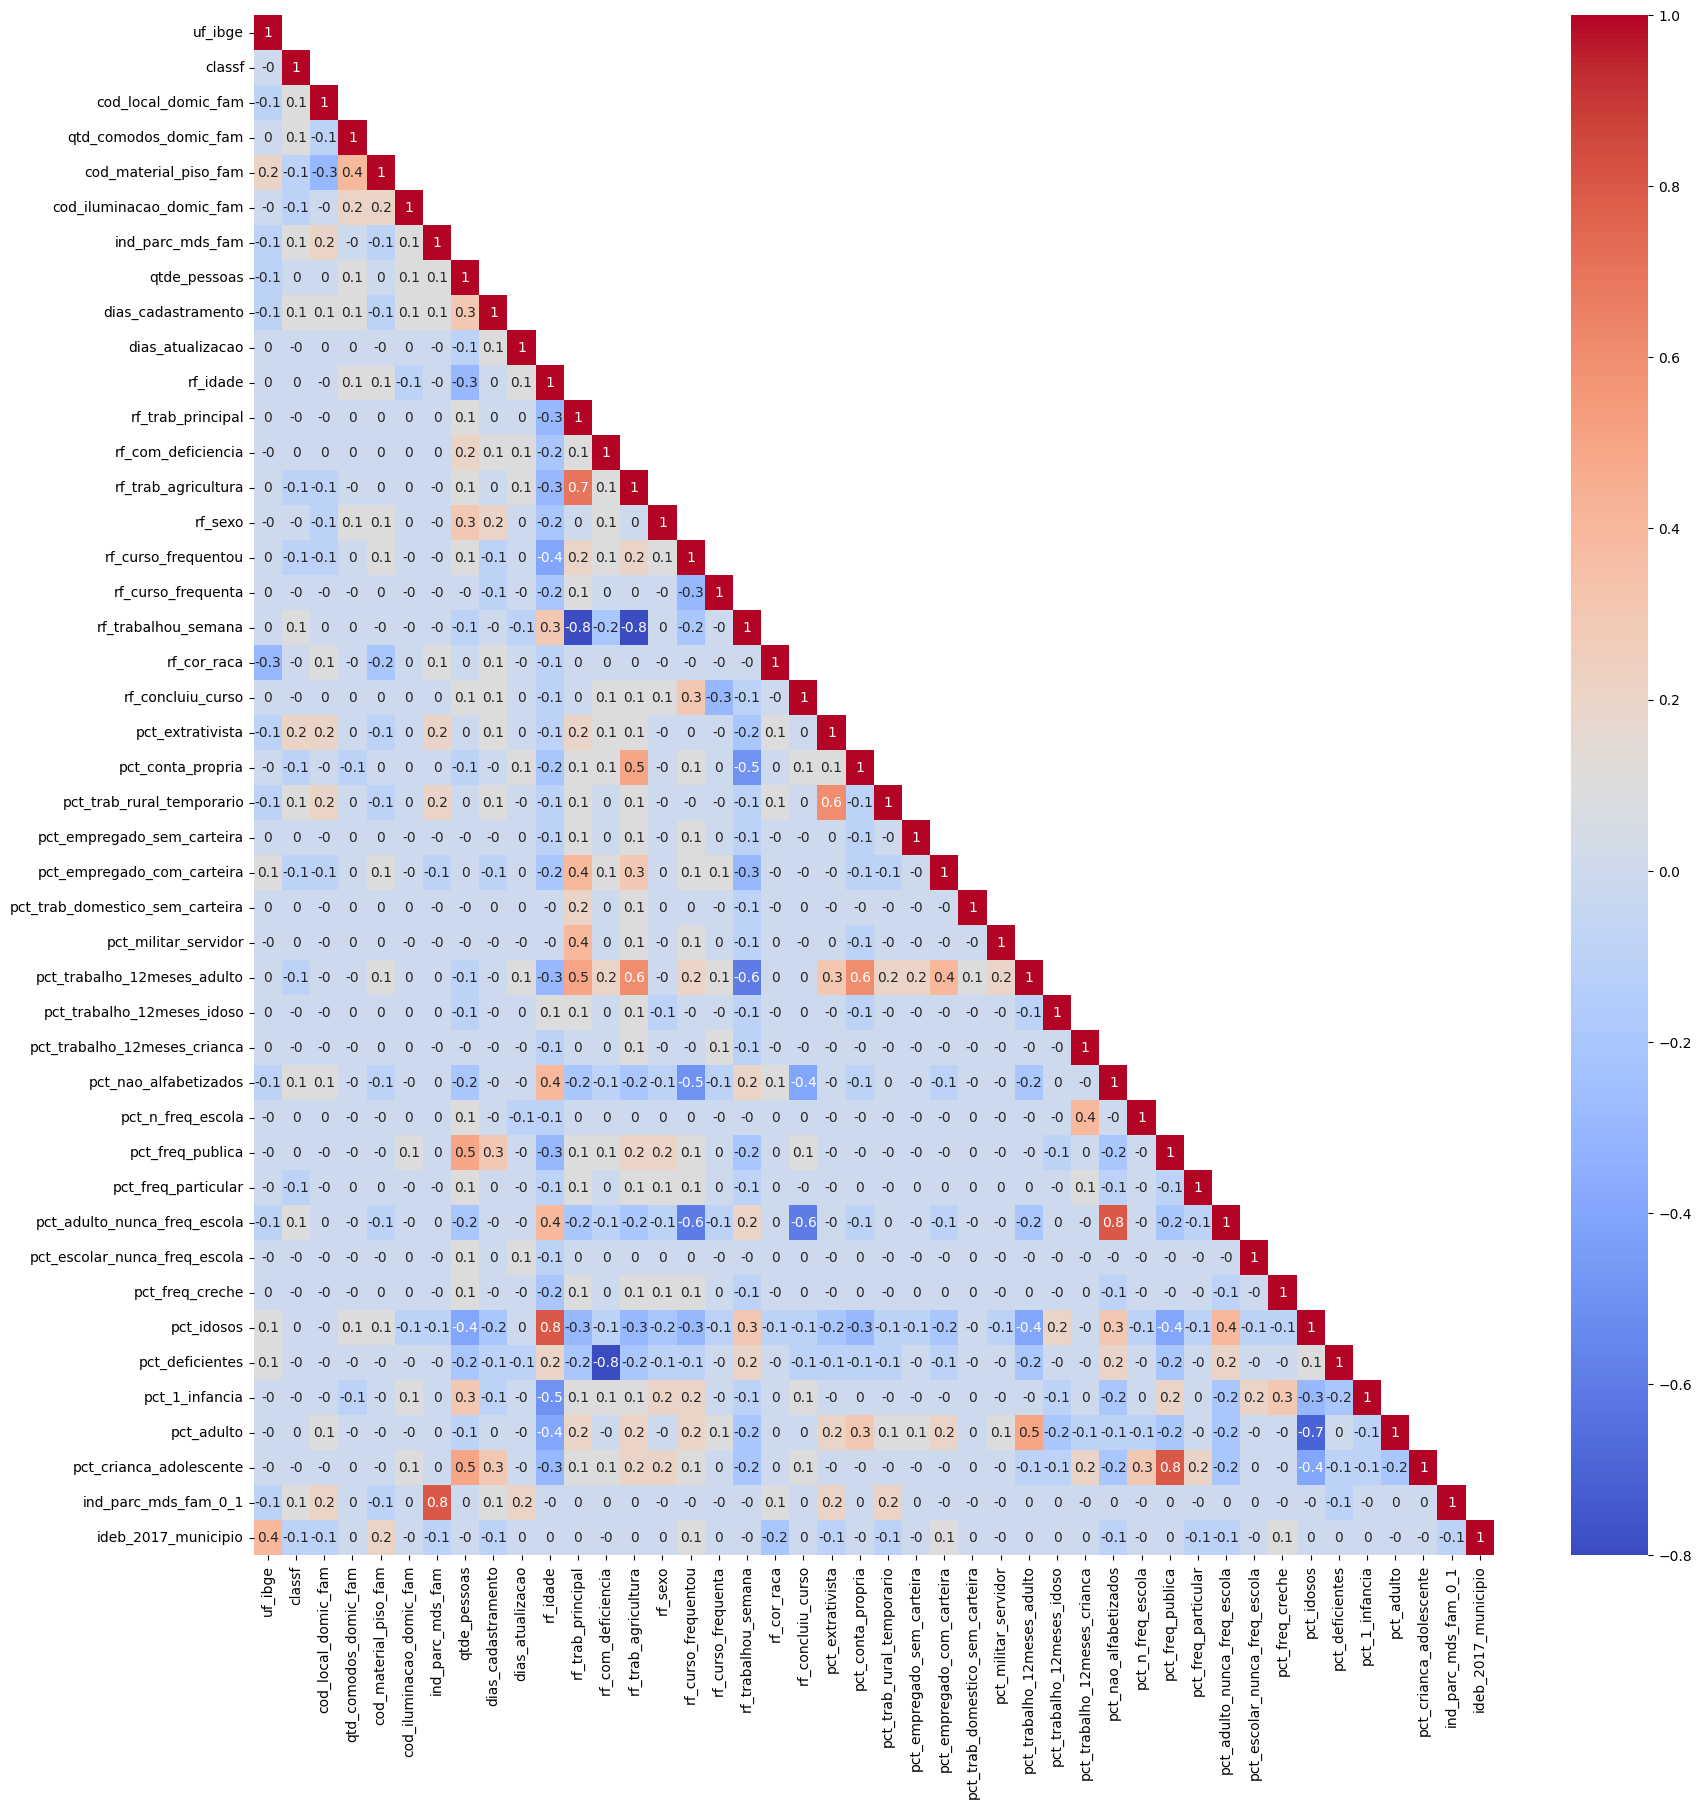

In [8]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [9]:
import numpy as np
import pandas as pd

# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        # Evita a auto-correlacão (corr = 1)
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")


Correlação forte entre ind_parc_mds_fam_0_1 e ind_parc_mds_fam: 0.8030947423626631
Correlação forte entre pct_adulto_nunca_freq_escola e pct_nao_alfabetizados: 0.81289494494895
Correlação forte entre pct_nao_alfabetizados e pct_adulto_nunca_freq_escola: 0.81289494494895
Correlação forte entre ind_parc_mds_fam e ind_parc_mds_fam_0_1: 0.8030947423626631


In [10]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_adulto_nunca_freq_escola', 'ind_parc_mds_fam'])
                                               
df_balanceado.head()

uf_ibge  classf  id_familia  cod_local_domic_fam  qtd_comodos_domic_fam  \
0       15       1     4736936                  1.0                    2.0   
1       13       3     2562870                  1.0                    4.0   
2       29       3     1843654                  2.0                    4.0   
3       28       3     1946851                  2.0                    5.0   
4       33       3     4194650                  1.0                    5.0   

   cod_material_piso_fam  cod_iluminacao_domic_fam  qtde_pessoas  \
0                    2.0                       1.0             3   
1                    2.0                       1.0             8   
2                    2.0                       1.0             2   
3                    2.0                       1.0             2   
4                    5.0                       1.0             3   

   dias_cadastramento  dias_atualizacao  ...  pct_freq_particular  \
0              3290.0               510  ...                  0.0   
1              1774.0               101  ...                  0.0   
2              1966.0               598  ...                  0.0   
3               812.0               285  ...                  0.0   
4              5772.0               591  ...                  0.0   

   pct_escolar_nunca_freq_escola  pct_freq_creche  pct_idosos  \
0                            0.0              0.0         0.0   
1                            0.0              0.0         0.0   
2                            0.5              0.0         0.0   
3                            0.0              0.0         0.0   
4                            0.0              0.0         0.0   

   pct_deficientes  pct_1_infancia  pct_adulto  pct_crianca_adolescente  \
0            0.000        0.000000    0.333333                 0.666667   
1            0.375        0.375000    0.250000                 0.375000   
2            0.000        0.000000    0.500000                 0.500000   
3            0.000        0.500000    0.500000                 0.000000   
4            0.000        0.333333    0.666667                 0.000000   

   ind_parc_mds_fam_0_1  ideb_2017_municipio  
0                   0.0                  4.8  
1                   0.0                  4.6  
2                   1.0                  4.0  
3                   0.0                  4.2  
4                   0.0                  4.6  

[5 rows x 44 columns]

In [11]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
    

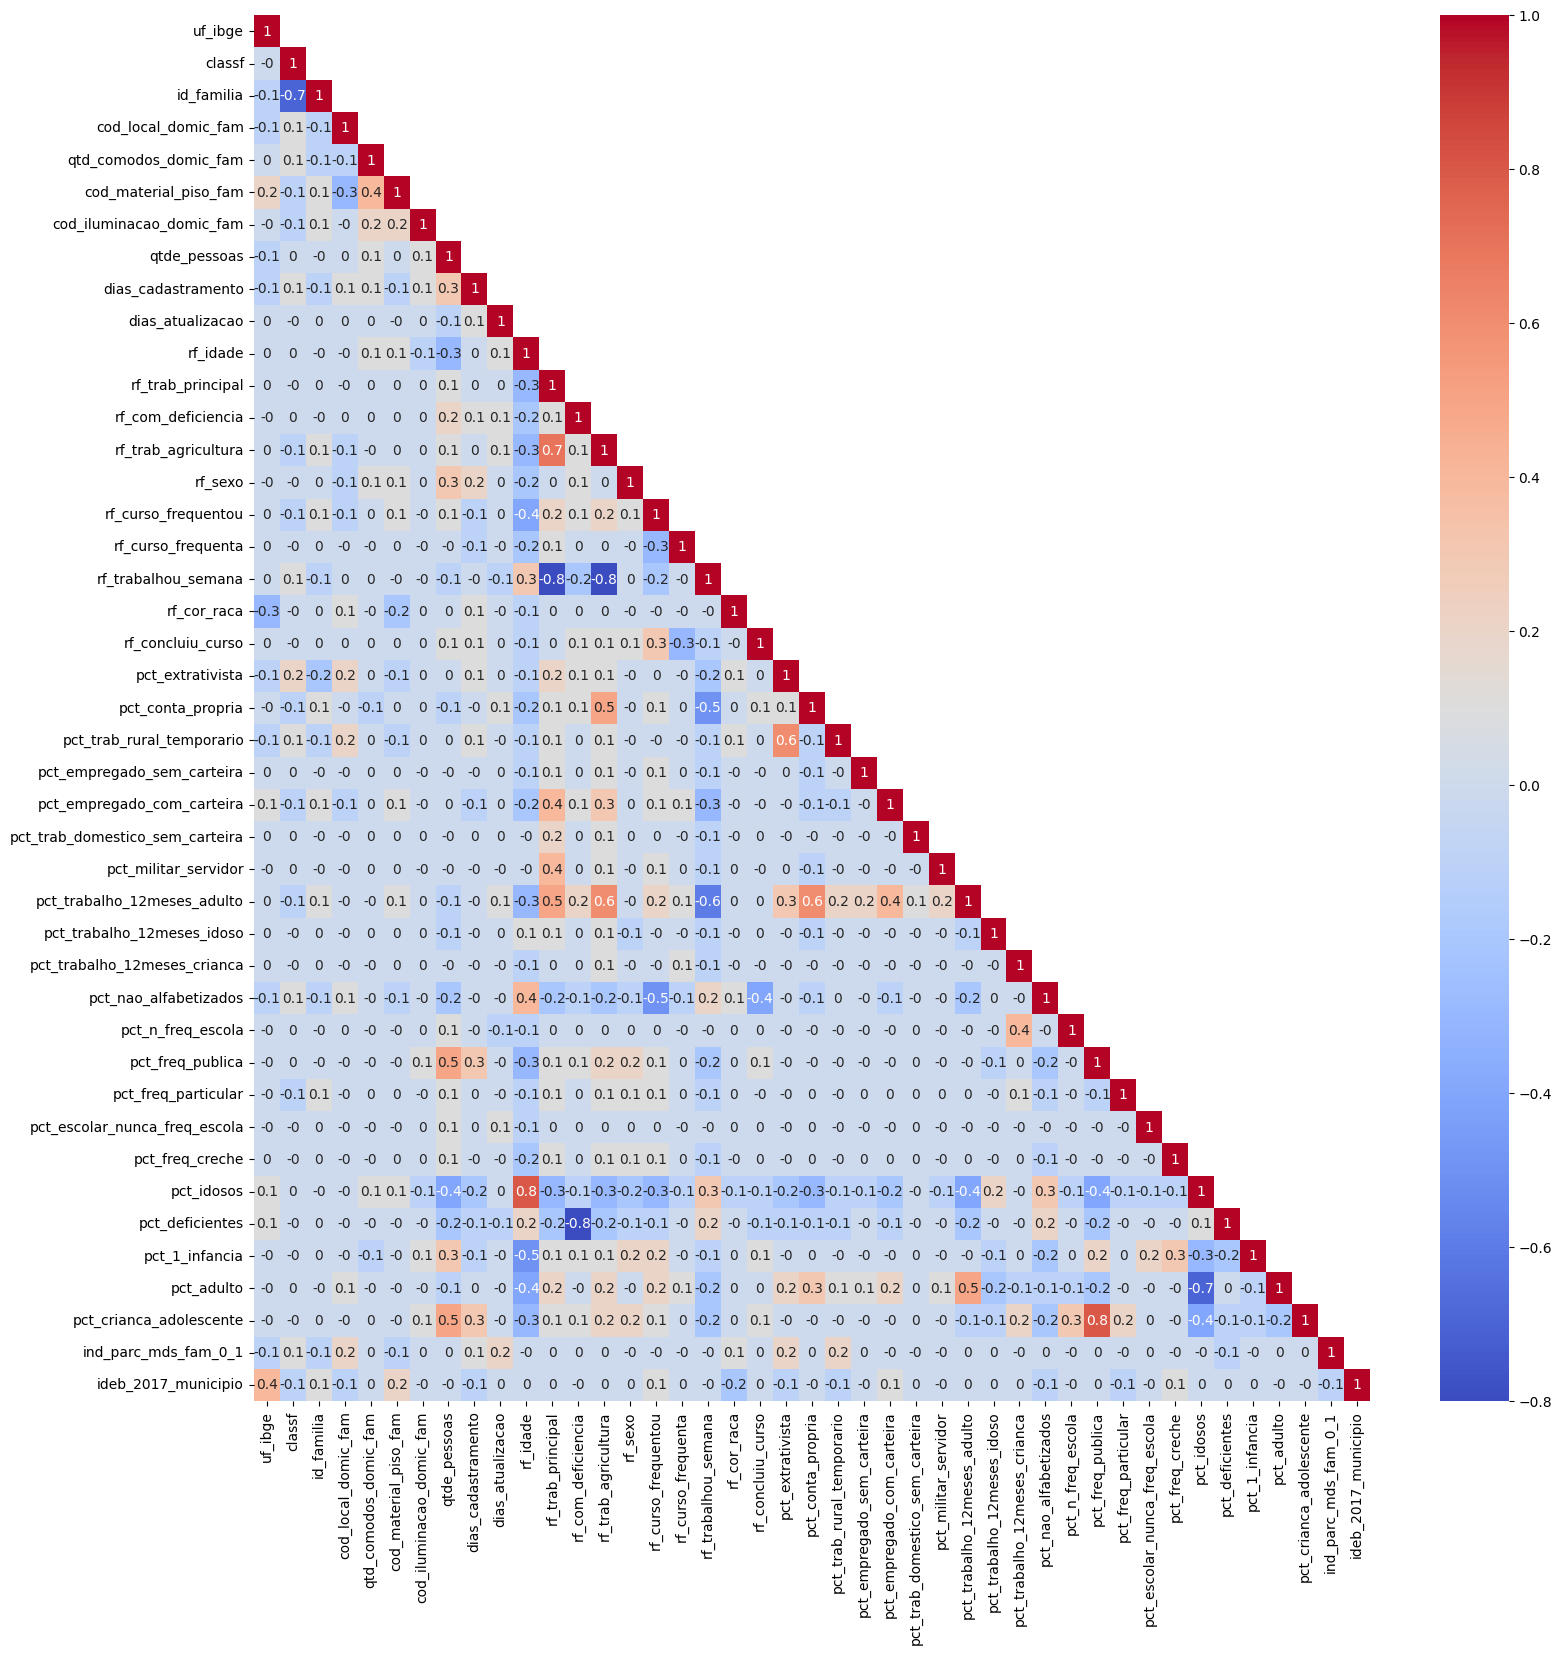

In [12]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [13]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.7
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: classf e id_familia, Correlação: 0.73
Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: rf_trab_principal e rf_trab_agricultura, Correlação: 0.73
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.81
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.80
Colunas: pct_idosos e pct_adulto, Correlação: 0.71


In [14]:
df_balanceado.head()

uf_ibge  classf  id_familia  cod_local_domic_fam  qtd_comodos_domic_fam  \
0       15       1     4736936                  1.0                    2.0   
1       13       3     2562870                  1.0                    4.0   
2       29       3     1843654                  2.0                    4.0   
3       28       3     1946851                  2.0                    5.0   
4       33       3     4194650                  1.0                    5.0   

   cod_material_piso_fam  cod_iluminacao_domic_fam  qtde_pessoas  \
0                    2.0                       1.0             3   
1                    2.0                       1.0             8   
2                    2.0                       1.0             2   
3                    2.0                       1.0             2   
4                    5.0                       1.0             3   

   dias_cadastramento  dias_atualizacao  ...  pct_freq_particular  \
0              3290.0               510  ...                  0.0   
1              1774.0               101  ...                  0.0   
2              1966.0               598  ...                  0.0   
3               812.0               285  ...                  0.0   
4              5772.0               591  ...                  0.0   

   pct_escolar_nunca_freq_escola  pct_freq_creche  pct_idosos  \
0                            0.0              0.0         0.0   
1                            0.0              0.0         0.0   
2                            0.5              0.0         0.0   
3                            0.0              0.0         0.0   
4                            0.0              0.0         0.0   

   pct_deficientes  pct_1_infancia  pct_adulto  pct_crianca_adolescente  \
0            0.000        0.000000    0.333333                 0.666667   
1            0.375        0.375000    0.250000                 0.375000   
2            0.000        0.000000    0.500000                 0.500000   
3            0.000        0.500000    0.500000                 0.000000   
4            0.000        0.333333    0.666667                 0.000000   

   ind_parc_mds_fam_0_1  ideb_2017_municipio  
0                   0.0                  4.8  
1                   0.0                  4.6  
2                   1.0                  4.0  
3                   0.0                  4.2  
4                   0.0                  4.6  

[5 rows x 44 columns]

In [15]:
df_balanceado.shape

(96792, 44)

# Fazendo uma amostra de 10mil

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Definindo a amostra
sample_size = 10000

# Fazendo a amostragem estratificada
df_sample, _ = train_test_split(df_balanceado, 
                                 train_size=sample_size, 
                                 stratify=df_balanceado['classe_renda'], 
                                 random_state=42)

# Mostrando a amostra resultante
print(df_sample['classe_renda'].value_counts())


classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64


In [17]:
df_sample.head()

uf_ibge  classf  id_familia  cod_local_domic_fam  \
79713       52       1     4353387                  1.0   
36046       27       1     4569986                  1.0   
93096       35       2     2618787                  1.0   
78642       51       1     4301802                  1.0   
23558       31       3     2055304                  1.0   

       qtd_comodos_domic_fam  cod_material_piso_fam  cod_iluminacao_domic_fam  \
79713                    5.0                    2.0                       1.0   
36046                    5.0                    2.0                       1.0   
93096                    5.0                    5.0                       1.0   
78642                    5.0                    5.0                       2.0   
23558                    4.0                    5.0                       1.0   

       qtde_pessoas  dias_cadastramento  dias_atualizacao  ...  \
79713             1               452.0               452  ...   
36046             3              1111.0               237  ...   
93096             2              1802.0               346  ...   
78642             2                28.0                28  ...   
23558             2              2393.0               851  ...   

       pct_freq_particular  pct_escolar_nunca_freq_escola  pct_freq_creche  \
79713                  0.0                            0.0              0.0   
36046                  0.0                            0.0              0.0   
93096                  0.0                            0.0              0.0   
78642                  0.0                            0.0              0.0   
23558                  0.0                            0.0              0.0   

       pct_idosos  pct_deficientes  pct_1_infancia  pct_adulto  \
79713         1.0         1.000000             0.0    0.000000   
36046         0.0         0.333333             0.0    0.666667   
93096         1.0         0.000000             0.0    0.000000   
78642         0.0         0.000000             0.5    0.500000   
23558         0.0         0.000000             0.0    1.000000   

       pct_crianca_adolescente  ind_parc_mds_fam_0_1  ideb_2017_municipio  
79713                 0.000000                   0.0                  5.9  
36046                 0.333333                   0.0                  5.0  
93096                 0.000000                   0.0                  6.2  
78642                 0.000000                   0.0                  5.6  
23558                 0.000000                   1.0                  6.3  

[5 rows x 44 columns]

In [18]:
df_sample.shape

(10000, 44)

In [19]:
df_sample.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
    

## Criando uma função de processamento OneHotEncoder

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df, id_col='id_familia', target_col='classe_renda'):
    # Definir colunas categóricas e numéricas
    binary_cols = ['ind_parc_mds_fam_0_1', 'rf_trabalhou_semana', 'rf_sexo', 'rf_com_deficiencia']  
    multiclass_cols = ['rf_concluiu_curso', 'rf_cor_raca', 'rf_curso_frequenta', 
                       'rf_curso_frequentou', 'rf_trab_agricultura', 'rf_trab_principal', 
                       'cod_iluminacao_domic_fam', 'cod_material_piso_fam', 
                       'cod_local_domic_fam', 'classf', 'uf_ibge'] 
    numerical_cols = ['ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 
                      'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam'] 
    percentage_cols = ['pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia', 
                       'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 
                       'pct_freq_particular', 'pct_freq_publica', 
                       'pct_n_freq_escola', 'pct_nao_alfabetizados', 
                       'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 
                       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 
                       'pct_trab_rural_temporario', 'pct_conta_propria', 
                       'pct_extrativista']  
    
    # Verificar se as colunas percentuais estão no formato correto
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Certificar-se de que a coluna de identificação está em formato de string
    df[id_col] = df[id_col].astype(str)

    # Inicializar o OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Usando sparse_output

    # Aplicar One-Hot Encoding nas colunas binárias
    encoded_binary = encoder.fit_transform(df[binary_cols])
    encoded_binary_df = pd.DataFrame(encoded_binary, columns=encoder.get_feature_names_out(binary_cols))

    # Reinstanciar o OneHotEncoder para as colunas multiclass
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Usando sparse_output
    encoded_multiclass = encoder.fit_transform(df[multiclass_cols])
    encoded_multiclass_df = pd.DataFrame(encoded_multiclass, columns=encoder.get_feature_names_out(multiclass_cols))

    # Concatenar as variáveis numéricas, percentuais e a coluna de identificação com as variáveis categóricas codificadas
    final_df = pd.concat([df[[id_col]].reset_index(drop=True),  # Manter a coluna de ID
                           df[numerical_cols].reset_index(drop=True), 
                           df[percentage_cols].reset_index(drop=True), 
                           encoded_binary_df.reset_index(drop=True), 
                           encoded_multiclass_df.reset_index(drop=True),
                           df[[target_col]].reset_index(drop=True)], 
                          axis=1)

    return final_df




In [21]:
#chamando a função
df_sample = preprocess_data(df_sample)
df_sample.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4353387                  5.9        71               452   
1    4569986                  5.0        45               237   
2    2618787                  6.2        72               346   
3    4301802                  5.6        23                28   
4    2055304                  6.3        39               851   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0               452.0             1                    5.0   
1              1111.0             3                    5.0   
2              1802.0             2                    5.0   
3                28.0             2                    5.0   
4              2393.0             2                    4.0   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  ...  uf_ibge_33  \
0                 0.000000    0.000000             0.0  ...         0.0   
1                 0.333333    0.666667             0.0  ...         0.0   
2                 0.000000    0.000000             0.0  ...         0.0   
3                 0.000000    0.500000             0.5  ...         0.0   
4                 0.000000    1.000000             0.0  ...         0.0   

   uf_ibge_35  uf_ibge_41  uf_ibge_42  uf_ibge_43  uf_ibge_50  uf_ibge_51  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         1.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         1.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   uf_ibge_52  uf_ibge_53  classe_renda  
0         1.0         0.0             2  
1         0.0         0.0             1  
2         0.0         0.0             2  
3         0.0         0.0             2  
4         0.0         0.0             0  

[5 rows x 116 columns]

In [22]:
df_sample.columns

Index(['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       ...
       'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43',
       'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53', 'classe_renda'],
      dtype='object', length=116)

## Criando uma função de normalização das colunas quantitativas

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o MinMaxScaler para normalização entre 0 e 1
    scaler = MinMaxScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso n
numerical_cols = ['ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 
                  'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam'] 


In [24]:
# Chamando a função
df_sample = normalize_numerical_columns(df_sample, numerical_cols)
df_sample.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4353387             0.683168  0.619565          0.292339   
1    4569986             0.594059  0.336957          0.147849   
2    2618787             0.712871  0.630435          0.221102   
3    4301802             0.653465  0.097826          0.007392   
4    2055304             0.722772  0.271739          0.560484   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.066493           0.0               0.315789   
1            0.167227           0.2               0.315789   
2            0.272852           0.1               0.315789   
3            0.001681           0.1               0.315789   
4            0.363192           0.1               0.263158   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  ...  uf_ibge_33  \
0                 0.000000    0.000000             0.0  ...         0.0   
1                 0.333333    0.666667             0.0  ...         0.0   
2                 0.000000    0.000000             0.0  ...         0.0   
3                 0.000000    0.500000             0.5  ...         0.0   
4                 0.000000    1.000000             0.0  ...         0.0   

   uf_ibge_35  uf_ibge_41  uf_ibge_42  uf_ibge_43  uf_ibge_50  uf_ibge_51  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         1.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         1.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   uf_ibge_52  uf_ibge_53  classe_renda  
0         1.0         0.0             2  
1         0.0         0.0             1  
2         0.0         0.0             2  
3         0.0         0.0             2  
4         0.0         0.0             0  

[5 rows x 116 columns]

In [25]:
# Ajustar a configuração do Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [26]:
# Exibir todas as colunas do DataFrame final
print(df_sample.columns.tolist())

['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'ind_parc_mds_fam_0_1_1.0', 'rf_trabalhou_semana_2.0', 'rf_sexo_2', 'rf_com_deficiencia_2', 'rf_concluiu_curso_1.0', 'rf_concluiu_curso_2.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0', 'rf_cor_raca_5.0', 'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0', 'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0', 'rf_curso_frequenta_12.0', 'rf_curso_fre

## Criando uma função de renomear as novas colunas craidas 

In [27]:
import pandas as pd

def rename_columns(df, column_mapping):
    """
    Renomeia as colunas do DataFrame com base em um dicionário de mapeamento.

    Args:
        df (pd.DataFrame): DataFrame a ser atualizado.
        column_mapping (dict): Dicionário contendo os mapeamentos de nomes de colunas.

    Returns:
        pd.DataFrame: DataFrame com colunas renomeadas.
    """
    # Renomeando as colunas no DataFrame
    df = df.rename(columns=column_mapping)
    return df

# Dicionário com os novos nomes das colunas
new_column_names = {
    'ind_parc_mds_fam_0_1_1.0': 'fam_gpte', 'rf_sexo_2': 'rf_feminino', 
    'rf_trabalhou_semana_2.0': 'rf_nao_trabalhou_semana', 
    'rf_com_deficiencia_2': 'rf_nao_deficiencia', 
    'rf_concluiu_curso_1.0': 'rf_concluiu_curso', 
    'rf_concluiu_curso_2.0': 'rf_nao_concluiu_curso', 
    'rf_cor_raca_2.0': 'rf_cor_preta', 'rf_cor_raca_3.0': 'rf_cor_amarela', 
    'rf_cor_raca_4.0': 'rf_cor_parda', 'rf_cor_raca_5.0': 'rf_cor_indigena',
    'rf_curso_frequenta_4.0': 'rf_frequenta_fund_reg_8anos', 
    'rf_curso_frequenta_5.0': 'rf_frequenta_fund_reg_9anos', 
    'rf_curso_frequenta_6.0': 'rf_frequenta_fund_especial', 
    'rf_curso_frequenta_7.0': 'rf_frequenta_medio_reg', 
    'rf_curso_frequenta_8.0': 'rf_frequenta_medio_especial', 
    'rf_curso_frequenta_9.0': 'rf_frequenta_eja_iniciais', 
    'rf_curso_frequenta_10.0': 'rf_frequenta_eja_finais', 
    'rf_curso_frequenta_11.0': 'rf_frequenta_eja_medio', 
    'rf_curso_frequenta_12.0': 'rf_frequenta_alfab_adulto', 
    'rf_curso_frequenta_13.0': 'rf_frequenta_superior', 
    'rf_curso_frequentou_2.0': 'rf_frequentou_pre_escola', 
    'rf_curso_frequentou_3.0': 'rf_frequentou_alfab', 
    'rf_curso_frequentou_4.0': 'rf_frequentou_fund_iniciais', 
    'rf_curso_frequentou_5.0': 'rf_frequentou_fund_finais', 
    'rf_curso_frequentou_6.0': 'rf_frequentou_fund_9anos', 
    'rf_curso_frequentou_7.0':  'rf_frequentou_fund_especial', 
    'rf_curso_frequentou_8.0': 'rf_frequentou_medio', 
    'rf_curso_frequentou_9.0': 'rf_frequentou_media_especial',
    'rf_curso_frequentou_10.0': 'rf_frequentou_eja_inicial', 
    'rf_curso_frequentou_11.0': 'rf_frequentou_eja_final', 
    'rf_curso_frequentou_12.0': 'rf_frequentou_eja_medio',
    'rf_curso_frequentou_13.0': 'rf_frequentou_superior', 
    'rf_curso_frequentou_14.0': 'rf_frequentou_alfab_aulto', 
    'rf_curso_frequentou_15.0': 'rf_frequentou_nenhum_curso',
    'rf_trab_agricultura_1.0': 'rf_trab_agricultura_sim', 
    'rf_trab_agricultura_2.0': 'rf_trab_agricultura_nao', 
    'rf_trab_agricultura_9.0': 'rf_trab_agricultura_nao_se_sabe',
    'rf_trab_principal_1.0': 'rf_trab_conta_propria', 
    'rf_trab_principal_2.0': 'rf_trab_temp_rural', 
    'rf_trab_principal_3.0': 'rf_trab_sem_carteira', 
    'rf_trab_principal_4.0': 'rf_trab_com_carteria', 
    'rf_trab_principal_5.0': 'rf_domestico_sem_carteira', 
    'rf_trab_principal_6.0': 'rf_trab_domestico_com_carteira', 
    'rf_trab_principal_7.0': 'rf_trab_nao_remunerado', 
    'rf_trab_principal_8.0': 'rf_trab_militar_servidor', 
    'rf_trab_principal_9.0': 'rf_trab_empregador',
    'rf_trab_principal_10.0': 'rf_trab_estagiario', 
    'rf_trab_principal_11.0': 'rf_trab_aprendiz', 
    'cod_iluminacao_domic_fam_1.0': 'cod_iluminacao_elet_com_medidor_prop', 
    'cod_iluminacao_domic_fam_2.0': 'cod_iluminacao_elet_com_medidor_comunitario', 
    'cod_iluminacao_domic_fam_3.0': 'cod_iluminacao_elet_sem_medidro', 
    'cod_iluminacao_domic_fam_4.0':'cod_iluminacao_oleo_gas', 
    'cod_iluminacao_domic_fam_5.0': 'cod_iluminacao_vela', 
    'cod_iluminacao_domic_fam_6.0': 'cod_iluminacao_outra',
    'cod_material_piso_fam_1.0':  'cod_piso_terra', 
    'cod_material_piso_fam_2.0': 'cod_piso_cimento', 
    'cod_material_piso_fam_3.0': 'cod_piso_madeira_aproveitada',
    'cod_material_piso_fam_4.0': 'cod_piso_madeira_aparelhada', 
    'cod_material_piso_fam_5.0': 'cod_piso_ceramica', 
    'cod_material_piso_fam_6.0': 'cod_piso_carpete',
    'cod_material_piso_fam_7.0': 'cod_piso_outro_material', 
    'cod_local_domic_fam_2.0': 'cod_local_domic_rural', 
    'cod_local_domic_fam_9.0': 'cod_local_domic_outra',
    'classf_2': 'reg_metropolitana', 
    'classf_3': 'outra_div_administrativa', 
    'uf_ibge_12': 'AC', 'uf_ibge_13': 'AM', 'uf_ibge_14': 'RR', 
    'uf_ibge_15': 'PA', 'uf_ibge_16': 'AP', 'uf_ibge_17': 'TO', 
    'uf_ibge_21': 'MA', 'uf_ibge_22': 'PI', 'uf_ibge_23': 'CE', 
    'uf_ibge_24': 'RN', 'uf_ibge_25': 'PB', 'uf_ibge_26': 'PE', 
    'uf_ibge_27': 'AL', 'uf_ibge_28': 'SE', 'uf_ibge_29': 'BA', 
    'uf_ibge_31': 'MG', 'uf_ibge_32': 'ES', 'uf_ibge_33': 'RJ', 
    'uf_ibge_35': 'SP', 'uf_ibge_41': 'PR', 'uf_ibge_42': 'SC', 
    'uf_ibge_43': 'RS', 'uf_ibge_50': 'MS', 'uf_ibge_51': 'MT', 
    'uf_ibge_52': 'GO', 'uf_ibge_53': 'DF'
}


In [28]:
# Chamando a função
df_sample = rename_columns(df_sample, new_column_names)
df_sample.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4353387             0.683168  0.619565          0.292339   
1    4569986             0.594059  0.336957          0.147849   
2    2618787             0.712871  0.630435          0.221102   
3    4301802             0.653465  0.097826          0.007392   
4    2055304             0.722772  0.271739          0.560484   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.066493           0.0               0.315789   
1            0.167227           0.2               0.315789   
2            0.272852           0.1               0.315789   
3            0.001681           0.1               0.315789   
4            0.363192           0.1               0.263158   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.000000    0.000000             0.0         1.000000   
1                 0.333333    0.666667             0.0         0.333333   
2                 0.000000    0.000000             0.0         0.000000   
3                 0.000000    0.500000             0.5         0.000000   
4                 0.000000    1.000000             0.0         0.000000   

   pct_idosos  pct_escolar_nunca_freq_escola  pct_freq_particular  \
0         1.0                            0.0                  0.0   
1         0.0                            0.0                  0.0   
2         1.0                            0.0                  0.0   
3         0.0                            0.0                  0.0   
4         0.0                            0.0                  0.0   

   pct_freq_publica  pct_n_freq_escola  pct_nao_alfabetizados  \
0          0.000000                0.0                    0.0   
1          0.333333                0.0                    0.0   
2          0.000000                0.0                    0.5   
3          0.000000                0.0                    0.0   
4          0.000000                0.0                    0.0   

   pct_trabalho_12meses_adulto  pct_militar_servidor  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.5                   0.0   
4                          0.5                   0.0   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.5                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  pct_extrativista  fam_gpte  \
0                        0.0                0.0               0.0       0.0   
1                        0.0                0.0               0.0       0.0   
2                        0.0                0.0               0.0       0.0   
3                        0.0                0.0               0.5       0.0   
4                        0.0                0.5               0.0       1.0   

   rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  \
0                      1.0          1.0                 0.0   
1                      1.0          0.0                 0.0   
2                      1.0          0.0                 1.0   
3                      0.0          1.0                 1.0   
4                      0.0          0.0                 1.0   

   rf_concluiu_curso  rf_nao_concluiu_curso  rf_cor_preta  rf_cor_amarela  \
0                0.0                    0.0           0.0             0.0   
1                0.0                    1.0           0.0             0.0   
2                0.0                    1.0           0.0             0.0   
3                1.0                    0.0           0.0             0.0   
4                1.0                  

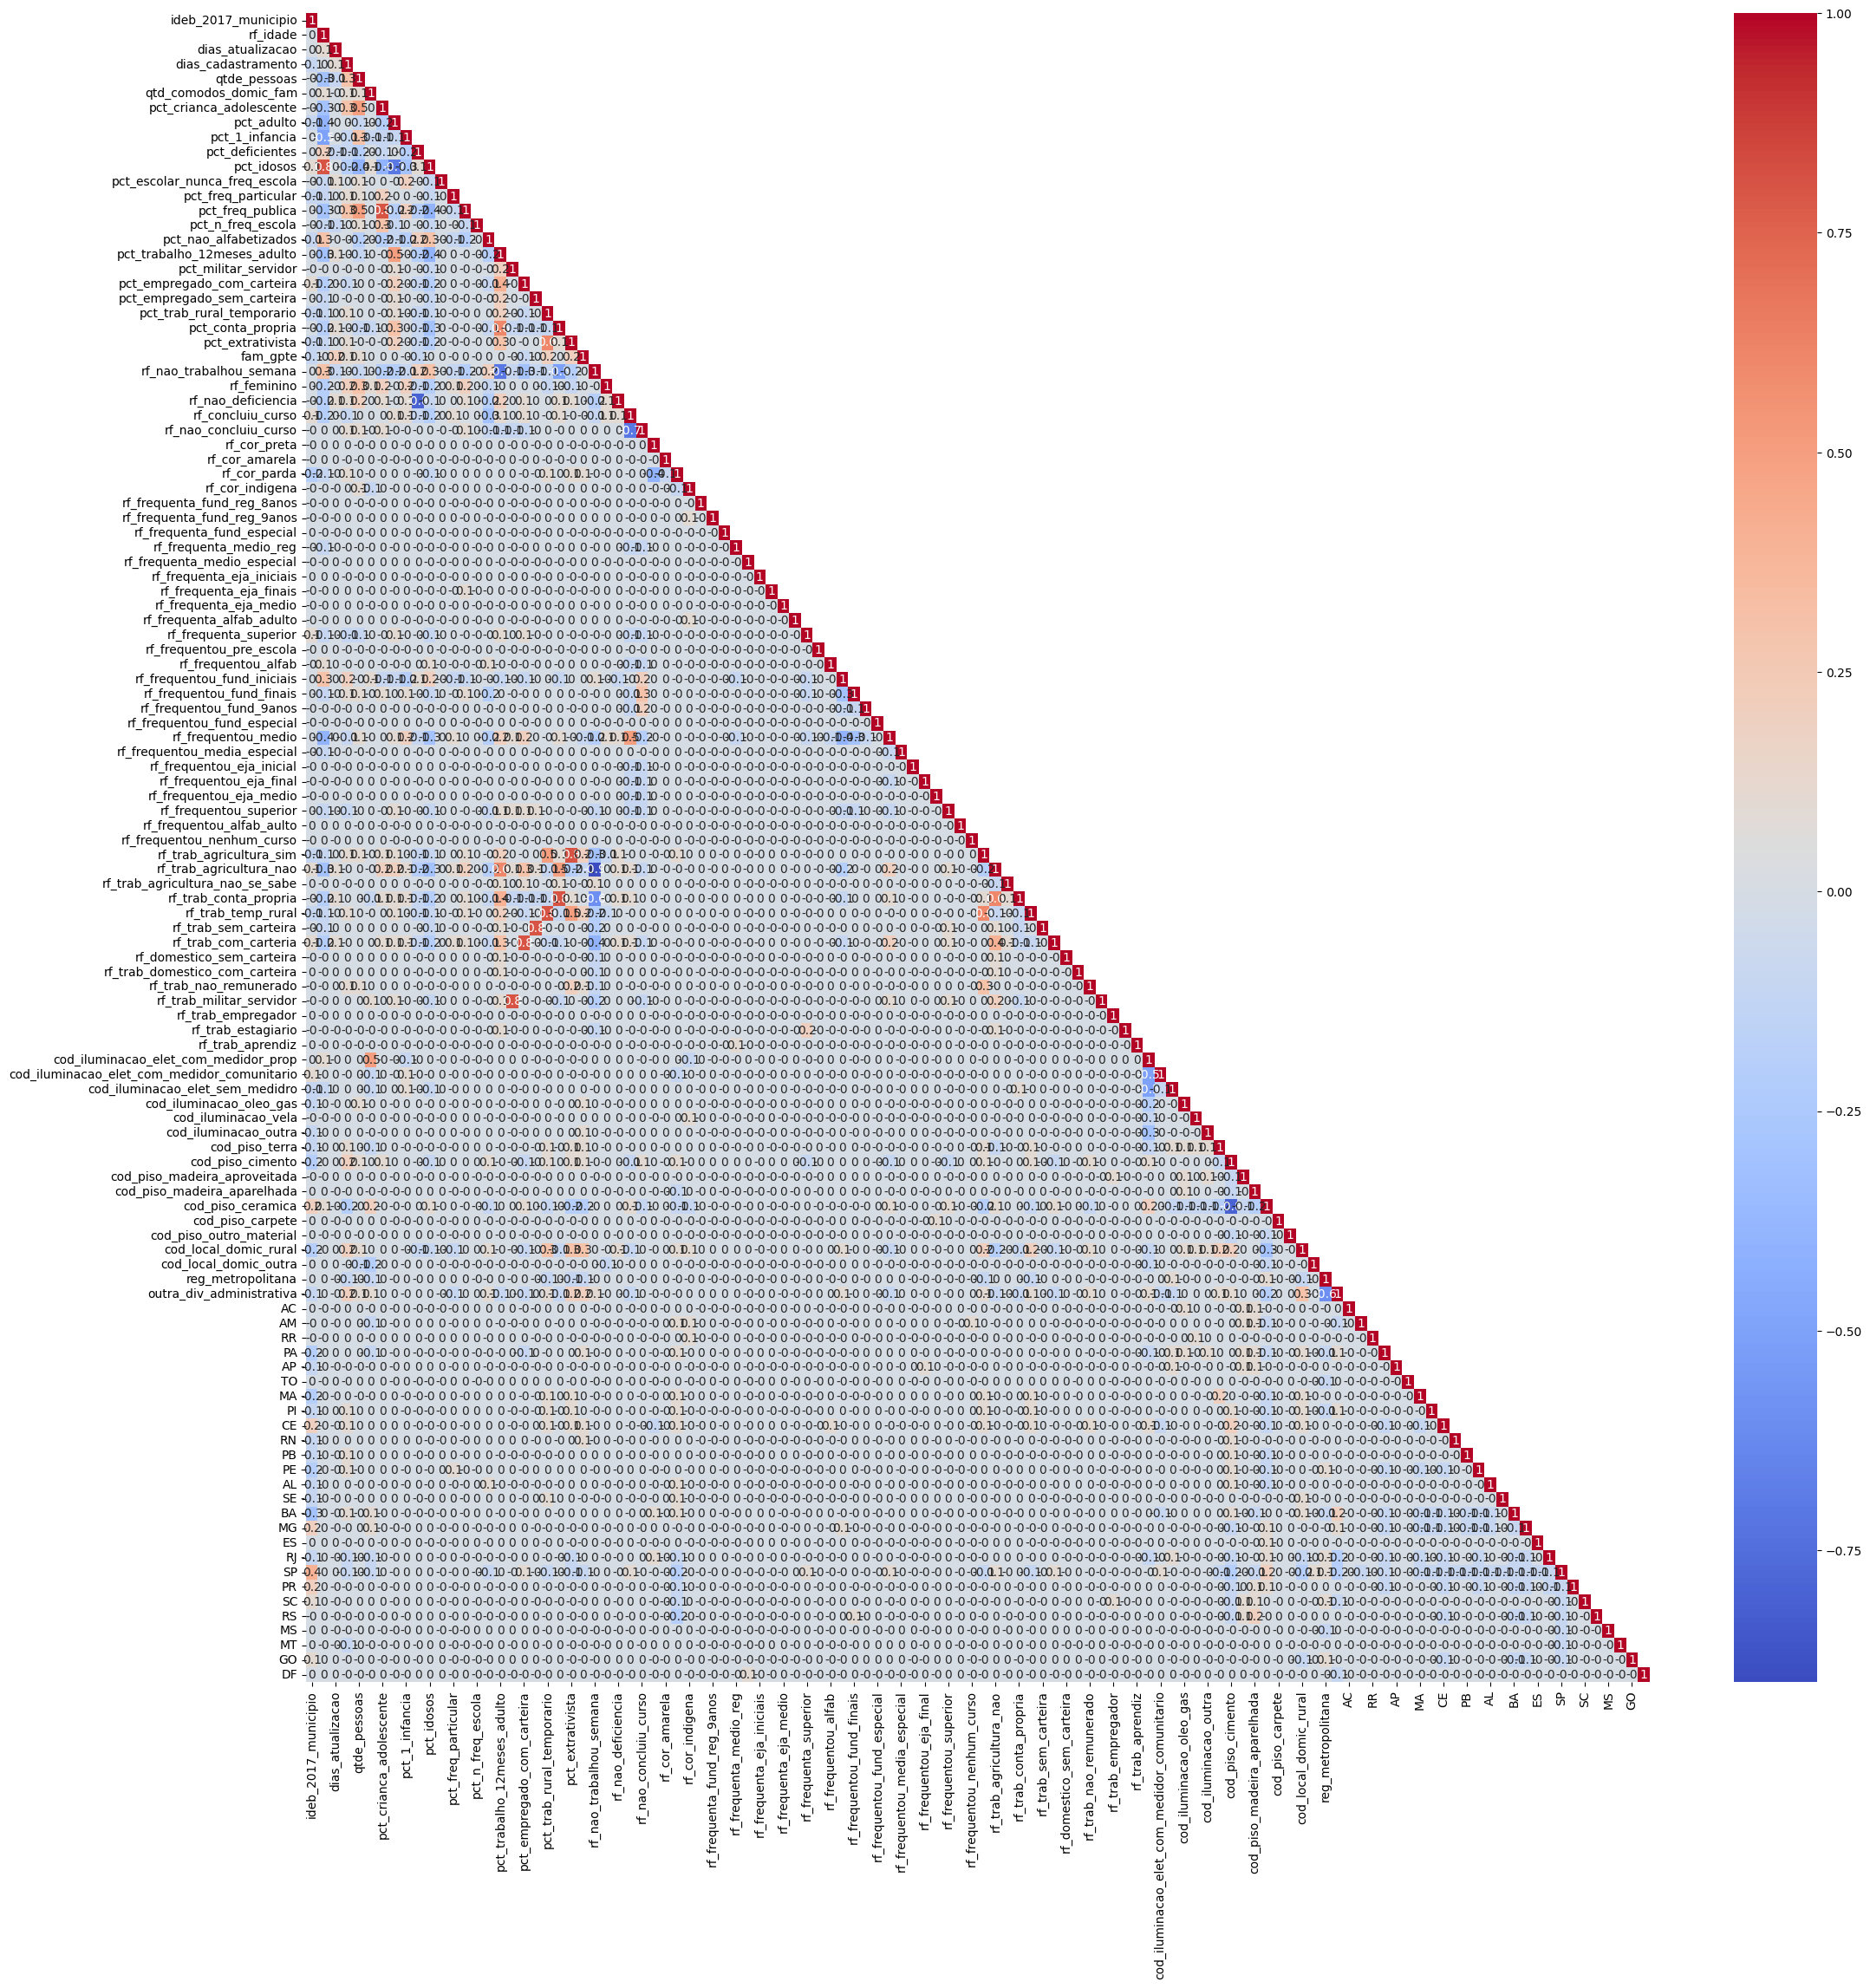

In [29]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_sample[['ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente',
                        'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 
                        'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 'pct_empregado_com_carteira', 
                        'pct_empregado_sem_carteira', 'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 
                        'rf_feminino', 'rf_nao_deficiencia', 'rf_concluiu_curso', 'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena',
                        'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 
                        'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 
                        'rf_frequentou_pre_escola', 'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos',
                        'rf_frequentou_fund_especial', 'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 'rf_frequentou_eja_final',
                        'rf_frequentou_eja_medio', 'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_trab_agricultura_sim',
                        'rf_trab_agricultura_nao', 'rf_trab_agricultura_nao_se_sabe', 'rf_trab_conta_propria', 'rf_trab_temp_rural', 'rf_trab_sem_carteira', 
                        'rf_trab_com_carteria', 'rf_domestico_sem_carteira', 'rf_trab_domestico_com_carteira', 'rf_trab_nao_remunerado', 'rf_trab_militar_servidor',
                        'rf_trab_empregador', 'rf_trab_estagiario', 'rf_trab_aprendiz', 'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario',
                        'cod_iluminacao_elet_sem_medidro', 'cod_iluminacao_oleo_gas', 'cod_iluminacao_vela', 'cod_iluminacao_outra', 'cod_piso_terra', 'cod_piso_cimento',
                        'cod_piso_madeira_aproveitada', 'cod_piso_madeira_aparelhada', 'cod_piso_ceramica', 'cod_piso_carpete', 'cod_piso_outro_material', 'cod_local_domic_rural',
                        'cod_local_domic_outra', 'reg_metropolitana', 'outra_div_administrativa', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE',
                        'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [30]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.7
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: rf_idade e pct_idosos, Correlação: 0.77
Colunas: pct_crianca_adolescente e pct_freq_publica, Correlação: 0.80
Colunas: pct_adulto e pct_idosos, Correlação: 0.72
Colunas: pct_deficientes e rf_nao_deficiencia, Correlação: 0.84
Colunas: pct_militar_servidor e rf_trab_militar_servidor, Correlação: 0.81
Colunas: pct_empregado_com_carteira e rf_trab_com_carteria, Correlação: 0.76
Colunas: pct_empregado_sem_carteira e rf_trab_sem_carteira, Correlação: 0.78
Colunas: pct_trab_rural_temporario e rf_trab_temp_rural, Correlação: 0.79
Colunas: pct_conta_propria e rf_trab_conta_propria, Correlação: 0.77
Colunas: pct_extrativista e rf_trab_agricultura_sim, Correlação: 0.79
Colunas: rf_nao_trabalhou_semana e rf_trab_agricultura_nao, Correlação: 0.86
Colunas: cod_piso_cimento e cod_piso_ceramica, Correlação: 0.77


In [31]:
df_sample = df_sample.drop(columns=['pct_militar_servidor', 'rf_trab_agricultura_nao'])

# Seleção das variáveis independentes (Features)

In [32]:
# Exibir todas as colunas do DataFrame final
print(df_sample.columns.tolist())

['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_nao_deficiencia', 'rf_concluiu_curso', 'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 'rf_frequentou_p

In [33]:
# Selecionando as variáveis que serão utilizadas para o modelo
X_sample = df_sample[[ 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 
                         'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica',
                         'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 
                         'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_nao_deficiencia',
                         'rf_concluiu_curso', 'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_frequenta_fund_reg_8anos',
                         'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais',
                         'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 'rf_frequentou_pre_escola', 
                         'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos', 'rf_frequentou_fund_especial', 
                         'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 'rf_frequentou_eja_final', 'rf_frequentou_eja_medio', 
                         'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_trab_agricultura_sim', 'rf_trab_agricultura_nao_se_sabe',
                         'rf_trab_conta_propria', 'rf_trab_temp_rural', 'rf_trab_sem_carteira', 'rf_trab_com_carteria', 'rf_domestico_sem_carteira', 
                         'rf_trab_domestico_com_carteira', 'rf_trab_nao_remunerado', 'rf_trab_militar_servidor', 'rf_trab_empregador', 'rf_trab_estagiario', 
                         'rf_trab_aprendiz', 'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario', 'cod_iluminacao_elet_sem_medidro', 
                         'cod_iluminacao_oleo_gas', 'cod_iluminacao_vela', 'cod_iluminacao_outra', 'cod_piso_terra', 'cod_piso_cimento', 'cod_piso_madeira_aproveitada', 
                         'cod_piso_madeira_aparelhada', 'cod_piso_ceramica', 'cod_piso_carpete', 'cod_piso_outro_material', 'cod_local_domic_rural', 'cod_local_domic_outra',
                         'reg_metropolitana', 'outra_div_administrativa', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG',
                         'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']]
y_sample = df_sample['classe_renda']

# Exibindo as informações de X
print('X_sample =', X_sample.shape)
X_sample.head()

X_sample = (10000, 112)


ideb_2017_municipio  rf_idade  dias_atualizacao  dias_cadastramento  \
0             0.683168  0.619565          0.292339            0.066493   
1             0.594059  0.336957          0.147849            0.167227   
2             0.712871  0.630435          0.221102            0.272852   
3             0.653465  0.097826          0.007392            0.001681   
4             0.722772  0.271739          0.560484            0.363192   

   qtde_pessoas  qtd_comodos_domic_fam  pct_crianca_adolescente  pct_adulto  \
0           0.0               0.315789                 0.000000    0.000000   
1           0.2               0.315789                 0.333333    0.666667   
2           0.1               0.315789                 0.000000    0.000000   
3           0.1               0.315789                 0.000000    0.500000   
4           0.1               0.263158                 0.000000    1.000000   

   pct_1_infancia  pct_deficientes  pct_idosos  pct_escolar_nunca_freq_escola  \
0             0.0         1.000000         1.0                            0.0   
1             0.0         0.333333         0.0                            0.0   
2             0.0         0.000000         1.0                            0.0   
3             0.5         0.000000         0.0                            0.0   
4             0.0         0.000000         0.0                            0.0   

   pct_freq_particular  pct_freq_publica  pct_n_freq_escola  \
0                  0.0          0.000000                0.0   
1                  0.0          0.333333                0.0   
2                  0.0          0.000000                0.0   
3                  0.0          0.000000                0.0   
4                  0.0          0.000000                0.0   

   pct_nao_alfabetizados  pct_trabalho_12meses_adulto  \
0                    0.0                          0.0   
1                    0.0                          0.0   
2                    0.5                          0.0   
3                    0.0                          0.5   
4                    0.0                          0.5   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.5                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  pct_extrativista  fam_gpte  \
0                        0.0                0.0               0.0       0.0   
1                        0.0                0.0               0.0       0.0   
2                        0.0                0.0               0.0       0.0   
3                        0.0                0.0               0.5       0.0   
4                        0.0                0.5               0.0       1.0   

   rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  \
0                      1.0          1.0                 0.0   
1                      1.0          0.0                 0.0   
2                      1.0          0.0                 1.0   
3                      0.0          1.0                 1.0   
4                      0.0          0.0                 1.0   

   rf_concluiu_curso  rf_nao_concluiu_curso  rf_cor_preta  rf_cor_amarela  \
0                0.0                    0.0           0.0             0.0   
1                0.0                    1.0           0.0             0.0   
2                0.0                    1.0           0.0             0.0   
3                1.0                    0.0           0.0             0.0   
4                1.0                    0.0           0.0             0.0   

   rf_cor_parda  rf_cor_indigena  rf_frequenta_fund_reg_8anos  \
0           0.0              0.0                          0.0   
1           1.0              0.0                          0.

In [34]:
# Verificar se há algum valor nulo no dataframe X
nulos = X_sample.isnull().sum()

# Exibir apenas as colunas que têm valores nulos
nulos_com_valores = nulos[nulos > 0]

print("Colunas com valores nulos e suas quantidades:")
print(nulos_com_valores)


Colunas com valores nulos e suas quantidades:
Series([], dtype: int64)


In [35]:
y_sample.head()

0    2
1    1
2    2
3    2
4    0
Name: classe_renda, dtype: int64

In [36]:
X_sample.describe()

ideb_2017_municipio      rf_idade  dias_atualizacao  \
count         10000.000000  10000.000000      10000.000000   
mean              0.646111      0.340589          0.277748   
std               0.096276      0.186414          0.226811   
min               0.000000      0.000000          0.000000   
25%               0.574257      0.184783          0.098790   
50%               0.653465      0.315217          0.227151   
75%               0.722772      0.489130          0.382560   
max               1.000000      1.000000          1.000000   

       dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
count        10000.000000   10000.00000           10000.000000   
mean             0.337140       0.14598               0.280153   
std              0.304338       0.13690               0.092789   
min              0.000000       0.00000               0.000000   
25%              0.065156       0.00000               0.263158   
50%              0.232651       0.10000               0.315789   
75%              0.575512       0.20000               0.315789   
max              1.000000       1.00000               1.000000   

       pct_crianca_adolescente    pct_adulto  pct_1_infancia  pct_deficientes  \
count             10000.000000  10000.000000    10000.000000     10000.000000   
mean                  0.155205      0.514175        0.103010         0.096398   
std                   0.226861      0.352454        0.185658         0.248570   
min                   0.000000      0.000000        0.000000         0.000000   
25%                   0.000000      0.250000        0.000000         0.000000   
50%                   0.000000      0.500000        0.000000         0.000000   
75%                   0.333333      1.000000        0.200000         0.000000   
max                   1.000000      1.000000        0.800000         1.000000   

         pct_idosos  pct_escolar_nunca_freq_escola  pct_freq_particular  \
count  10000.000000                   10000.000000         10000.000000   
mean       0.227610                       0.006213             0.013516   
std        0.391815                       0.047130             0.075783   
min        0.000000                       0.000000             0.000000   
25%        0.000000                       0.000000             0.000000   
50%        0.000000                       0.000000             0.000000   
75%        0.333333                       0.000000             0.000000   
max        1.000000                       1.000000             1.000000   

       pct_freq_publica  pct_n_freq_escola  pct_nao_alfabetizados  \
count      10000.000000       10000.000000           10000.000000   
mean           0.159188           0.014497               0.135136   
std            0.231504           0.078900               0.293486   
min            0.000000           0.000000               0.000000   
25%            0.000000           0.000000               0.000000   
50%            0.000000           0.000000               0.000000   
75%            0.333333           0.000000               0.000000   
max            1.000000           1.000000               1.000000   

       pct_trabalho_12meses_adulto  pct_empregado_com_carteira  \
count                 10000.000000                10000.000000   
mean                      0.243922                    0.060216   
std                       0.307997                    0.173748   
min                       0.000000                    0.000000   
25%                       0.000000                    0.000000   
50%                       0.000000                    0.000000   
75%                       0.500000                    0.000000   
max                       1.000000                    1.000000   

       pct_empregado_sem_carteira  pct_trab_rural_temporario  \
count                10000.000000               10000.000000   
mean                     0.009378                   0.022702   
std                      0.075024     

In [37]:
y_sample.describe()

count    10000.000000
mean         1.007200
std          0.818667
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: classe_renda, dtype: float64

In [38]:
y_sample.value_counts()

classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64

In [39]:
y_sample.isnull().sum()

0

In [40]:
# Dividir os dados em treino e teste
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

In [41]:
y_sample_train.describe()

count    8000.000000
mean        1.007250
std         0.818707
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: classe_renda, dtype: float64

# Fazendo validação cruzada

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [43]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    }
}


In [44]:
# Verificar se o diretório temporário existe, e criar se não existir
temp_dir = 'catboost_tmp'
os.makedirs(temp_dir, exist_ok=True)

In [45]:
# Definir a quantidade de folds para validação cruzada
n_splits = 5
stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop para treinar e validar cada modelo
for model_name, model_info in models.items():
    print(f"Treinando e validando o modelo: {model_name}")
    
    # Criar pipeline apenas com o modelo (sem necessidade de pré-processamento)
    pipeline = Pipeline(steps=[
        ('classifier', model_info['model'])
    ])
    
    # Configurar o GridSearchCV com validação cruzada
    grid_search = GridSearchCV(
        pipeline, 
        param_grid=model_info['param_grid'], 
        cv=stratified_kf, 
        scoring='accuracy', 
        n_jobs=-1
    )
    
    # Treinar o modelo usando validação cruzada no conjunto de treino
    grid_search.fit(X_sample_train, y_sample_train)
    
    # Exibir os melhores parâmetros e a melhor pontuação
    print(f"Melhores parâmetros para {model_name}: {grid_search.best_params_}")
    print(f"Melhor pontuação de validação cruzada para {model_name}: {grid_search.best_score_}")

Treinando e validando o modelo: DecisionTree
Melhores parâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhor pontuação de validação cruzada para DecisionTree: 0.68525
Treinando e validando o modelo: RandomForest
Melhores parâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Melhor pontuação de validação cruzada para RandomForest: 0.7215
Treinando e validando o modelo: XGBoost
Melhores parâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Melhor pontuação de validação cruzada para XGBoost: 0.729875
Treinando e validando o modelo: CatBoost
Melhores parâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}
Melhor pontuação de validação cruzada para CatBoost: 0.7335
Treinando e validando o modelo: LogisticRegression
Melhores parâmetros para LogisticRegression: {'classifier__C': 10, 

In [46]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Loop para treinar e validar cada modelo
for model_name, model_info in models.items():
    print(f"Treinando e validando o modelo: {model_name}")
    
    # Criar pipeline apenas com o modelo (sem necessidade de pré-processamento)
    pipeline = Pipeline(steps=[
        ('classifier', model_info['model'])
    ])
    
    # Configurar o GridSearchCV com validação cruzada
    grid_search = GridSearchCV(
        pipeline, 
        param_grid=model_info['param_grid'], 
        cv=stratified_kf, 
        scoring='accuracy', 
        n_jobs=-1
    )
    
    # Treinar o modelo usando validação cruzada no conjunto de treino
    grid_search.fit(X_sample_train, y_sample_train)
    
    # Exibir os melhores parâmetros e a melhor pontuação
    print(f"Melhores parâmetros para {model_name}: {grid_search.best_params_}")
    print(f"Melhor pontuação de validação cruzada para {model_name}: {grid_search.best_score_}")   
 
    # Obter o melhor modelo encontrado
    best_model = grid_search.best_estimator_
    
    # Avaliar o melhor modelo nos dados de teste
    y_sample_pred = best_model.predict(X_sample_test)
    accuracy = accuracy_score(y_sample_test, y_sample_pred)
    f1 = f1_score(y_sample_test, y_sample_pred, average='weighted')
    
    print(f"Desempenho do modelo {model_name} nos dados de teste:")
    print(f"Acurácia: {accuracy}")
    print(f"F1 Score (ponderado): {f1}")
    print("Relatório de classificação:")
    print(classification_report(y_sample_test, y_sample_pred))


Treinando e validando o modelo: DecisionTree
Melhores parâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 5}
Melhor pontuação de validação cruzada para DecisionTree: 0.685375
Desempenho do modelo DecisionTree nos dados de teste:
Acurácia: 0.6845
F1 Score (ponderado): 0.6708141182189388
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.65      0.84      0.74       663
           1       0.70      0.42      0.53       660
           2       0.71      0.79      0.75       677

    accuracy                           0.68      2000
   macro avg       0.69      0.68      0.67      2000
weighted avg       0.69      0.68      0.67      2000

Treinando e validando o modelo: RandomForest
Melhores parâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Melhor pontuação de validação cruzada para RandomForest: 0.7208749999999999
Desempenho do modelo RandomForest nos dad

# Comparando os diversos modelos usando toda a base amostral usando os melhores parâmtros obtidos com a validação cruzada

In [47]:
df_balanceado.head()

uf_ibge  classf  id_familia  cod_local_domic_fam  qtd_comodos_domic_fam  \
0       15       1     4736936                  1.0                    2.0   
1       13       3     2562870                  1.0                    4.0   
2       29       3     1843654                  2.0                    4.0   
3       28       3     1946851                  2.0                    5.0   
4       33       3     4194650                  1.0                    5.0   

   cod_material_piso_fam  cod_iluminacao_domic_fam  qtde_pessoas  \
0                    2.0                       1.0             3   
1                    2.0                       1.0             8   
2                    2.0                       1.0             2   
3                    2.0                       1.0             2   
4                    5.0                       1.0             3   

   dias_cadastramento  dias_atualizacao  classe_renda  rf_idade  \
0              3290.0               510             0        44   
1              1774.0               101             0        38   
2              1966.0               598             0        31   
3               812.0               285             0        55   
4              5772.0               591             0        51   

   rf_trab_principal  rf_com_deficiencia  rf_trab_agricultura  rf_sexo  \
0                1.0                   2                  2.0        2   
1               -1.0                   2                 -1.0        2   
2                1.0                   2                  2.0        1   
3                1.0                   2                  1.0        2   
4                1.0                   2                  2.0        2   

   rf_curso_frequentou  rf_curso_frequenta  rf_trabalhou_semana  rf_cor_raca  \
0                 -1.0                -1.0                  1.0          4.0   
1                 12.0                -1.0                  2.0          4.0   
2                  8.0                -1.0                  1.0          2.0   
3                  4.0                -1.0                  1.0          4.0   
4                  5.0                -1.0                  1.0          1.0   

   rf_concluiu_curso  pct_extrativista  pct_conta_propria  \
0               -1.0               0.0           0.333333   
1               -1.0               0.0           0.000000   
2                2.0               0.0           0.500000   
3                2.0               0.5           0.500000   
4                2.0               0.0           0.333333   

   pct_trab_rural_temporario  pct_empregado_sem_carteira  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   pct_empregado_com_carteira  pct_trab_domestico_sem_carteira  \
0                         0.0                              0.0   
1                         0.0                              0.0   
2                         0.0                              0.0   
3                         0.0                              0.0   
4                         0.0                              0.0   

   pct_militar_servidor  pct_trabalho_12meses_adulto  \
0                   0.0                     0.333333   
1                   0.0                     0.000000   
2                   0.0                     0.500000   
3                   0.0                     0.500000   
4                   0.0                     0.333333   

   pct_trabalho_12meses_idoso  pct_trabalho_12meses_crianca  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                  

In [48]:
df_balanceado.shape

(96792, 44)

## Chamando a função de processamento OneHotEncoder

In [49]:
# Chamando a função criada para transformar as variáveis categóricas
df_balanceado = preprocess_data(df_balanceado)

In [50]:
df_balanceado.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936                  4.8        44               510   
1    2562870                  4.6        38               101   
2    1843654                  4.0        31               598   
3    1946851                  4.2        55               285   
4    4194650                  4.6        51               591   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0              3290.0             3                    2.0   
1              1774.0             8                    4.0   
2              1966.0             2                    4.0   
3               812.0             2                    5.0   
4              5772.0             3                    5.0   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_escolar_nunca_freq_escola  pct_freq_particular  \
0         0.0                            0.0                  0.0   
1         0.0                            0.0                  0.0   
2         0.0                            0.5                  0.0   
3         0.0                            0.0                  0.0   
4         0.0                            0.0                  0.0   

   pct_freq_publica  pct_n_freq_escola  pct_nao_alfabetizados  \
0          0.666667              0.000               0.333333   
1          0.375000              0.125               0.125000   
2          0.000000              0.000               0.000000   
3          0.000000              0.000               0.000000   
4          0.333333              0.000               0.000000   

   pct_trabalho_12meses_adulto  pct_militar_servidor  \
0                     0.333333                   0.0   
1                     0.000000                   0.0   
2                     0.500000                   0.0   
3                     0.500000                   0.0   
4                     0.333333                   0.0   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  pct_extrativista  \
0                        0.0           0.333333               0.0   
1                        0.0           0.000000               0.0   
2                        0.0           0.500000               0.0   
3                        0.0           0.500000               0.5   
4                        0.0           0.333333               0.0   

   ind_parc_mds_fam_0_1_1.0  rf_trabalhou_semana_2.0  rf_sexo_2  \
0                       0.0                      0.0        1.0   
1                       0.0                      1.0        1.0   
2                       1.0                      0.0        0.0   
3                       0.0                      0.0        1.0   
4                       0.0                      0.0        1.0   

   rf_com_deficiencia_2  rf_concluiu_curso_1.0  rf_concluiu_curso_2.0  \
0                   1.0                    0.0                    0.0   
1                   1.0                    0.0                    0.0   
2                   1.0                    0.0                    1.0   
3                   1.0                    0.0                    1.0   
4                   1.0                    0.0                    1.0   

   rf_cor_raca_2.0  

## Chamando a função para normalização das colunas quantitativas

In [51]:
# Chamando a função de normalização das colunas quantitativas
df_balanceado = normalize_numerical_columns(df_balanceado, numerical_cols)

In [52]:
df_balanceado.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.500306      0.166667               0.142857   
1            0.268572      0.583333               0.238095   
2            0.297921      0.083333               0.238095   
3            0.121522      0.083333               0.285714   
4            0.879700      0.166667               0.285714   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_escolar_nunca_freq_escola  pct_freq_particular  \
0         0.0                            0.0                  0.0   
1         0.0                            0.0                  0.0   
2         0.0                            0.5                  0.0   
3         0.0                            0.0                  0.0   
4         0.0                            0.0                  0.0   

   pct_freq_publica  pct_n_freq_escola  pct_nao_alfabetizados  \
0          0.666667              0.000               0.333333   
1          0.375000              0.125               0.125000   
2          0.000000              0.000               0.000000   
3          0.000000              0.000               0.000000   
4          0.333333              0.000               0.000000   

   pct_trabalho_12meses_adulto  pct_militar_servidor  \
0                     0.333333                   0.0   
1                     0.000000                   0.0   
2                     0.500000                   0.0   
3                     0.500000                   0.0   
4                     0.333333                   0.0   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  pct_extrativista  \
0                        0.0           0.333333               0.0   
1                        0.0           0.000000               0.0   
2                        0.0           0.500000               0.0   
3                        0.0           0.500000               0.5   
4                        0.0           0.333333               0.0   

   ind_parc_mds_fam_0_1_1.0  rf_trabalhou_semana_2.0  rf_sexo_2  \
0                       0.0                      0.0        1.0   
1                       0.0                      1.0        1.0   
2                       1.0                      0.0        0.0   
3                       0.0                      0.0        1.0   
4                       0.0                      0.0        1.0   

   rf_com_deficiencia_2  rf_concluiu_curso_1.0  rf_concluiu_curso_2.0  \
0                   1.0                    0.0                    0.0   
1                   1.0                    0.0                    0.0   
2                   1.0                    0.0                    1.0   
3                   1.0                    0.0                    1.0   
4                   1.0                    0.0                    1.0   

   rf_cor_raca_2.0  

## Chamando a função para revisão do nome das colunas

In [53]:
# Chamando a função para revisão do nome das colunas
df_balanceado = rename_columns(df_balanceado, new_column_names)

In [54]:
df_balanceado.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.500306      0.166667               0.142857   
1            0.268572      0.583333               0.238095   
2            0.297921      0.083333               0.238095   
3            0.121522      0.083333               0.285714   
4            0.879700      0.166667               0.285714   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_escolar_nunca_freq_escola  pct_freq_particular  \
0         0.0                            0.0                  0.0   
1         0.0                            0.0                  0.0   
2         0.0                            0.5                  0.0   
3         0.0                            0.0                  0.0   
4         0.0                            0.0                  0.0   

   pct_freq_publica  pct_n_freq_escola  pct_nao_alfabetizados  \
0          0.666667              0.000               0.333333   
1          0.375000              0.125               0.125000   
2          0.000000              0.000               0.000000   
3          0.000000              0.000               0.000000   
4          0.333333              0.000               0.000000   

   pct_trabalho_12meses_adulto  pct_militar_servidor  \
0                     0.333333                   0.0   
1                     0.000000                   0.0   
2                     0.500000                   0.0   
3                     0.500000                   0.0   
4                     0.333333                   0.0   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  pct_extrativista  fam_gpte  \
0                        0.0           0.333333               0.0       0.0   
1                        0.0           0.000000               0.0       0.0   
2                        0.0           0.500000               0.0       1.0   
3                        0.0           0.500000               0.5       0.0   
4                        0.0           0.333333               0.0       0.0   

   rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  \
0                      0.0          1.0                 1.0   
1                      1.0          1.0                 1.0   
2                      0.0          0.0                 1.0   
3                      0.0          1.0                 1.0   
4                      0.0          1.0                 1.0   

   rf_concluiu_curso  rf_nao_concluiu_curso  rf_cor_preta  rf_cor_amarela  \
0                0.0                    0.0           0.0             0.0   
1                0.0                    0.0           0.0             0.0   
2                0.0                    1.0           1.0             0.0   
3                0.0                    1.0           0.0             0.0   
4                0.0                  

In [55]:
# Verificar a presença de valores NaN
print(df_balanceado.isnull().sum().sum())

1


In [56]:
df_balanceado = df_balanceado.dropna()

In [57]:
# Verificar a presença de valores NaN
print(df_balanceado.isnull().sum().sum())

0


## Criando o dataframe X e a variável target y

In [58]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_balanceado[[ 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 
                         'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica',
                         'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 
                         'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_nao_deficiencia',
                         'rf_concluiu_curso', 'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_frequenta_fund_reg_8anos',
                         'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais',
                         'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 'rf_frequentou_pre_escola', 
                         'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos', 'rf_frequentou_fund_especial', 
                         'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 'rf_frequentou_eja_final', 'rf_frequentou_eja_medio', 
                         'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_trab_agricultura_sim', 'rf_trab_agricultura_nao_se_sabe',
                         'rf_trab_conta_propria', 'rf_trab_temp_rural', 'rf_trab_sem_carteira', 'rf_trab_com_carteria', 'rf_domestico_sem_carteira', 
                         'rf_trab_domestico_com_carteira', 'rf_trab_nao_remunerado', 'rf_trab_militar_servidor', 'rf_trab_empregador', 'rf_trab_estagiario', 
                         'rf_trab_aprendiz', 'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario', 'cod_iluminacao_elet_sem_medidro', 
                         'cod_iluminacao_oleo_gas', 'cod_iluminacao_vela', 'cod_iluminacao_outra', 'cod_piso_terra', 'cod_piso_cimento', 'cod_piso_madeira_aproveitada', 
                         'cod_piso_madeira_aparelhada', 'cod_piso_ceramica', 'cod_piso_carpete', 'cod_piso_outro_material', 'cod_local_domic_rural', 'cod_local_domic_outra',
                         'reg_metropolitana', 'outra_div_administrativa', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG',
                         'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']]
y = df_balanceado['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 112)


ideb_2017_municipio  rf_idade  dias_atualizacao  dias_cadastramento  \
0             0.574257  0.294118          0.331317            0.500306   
1             0.554455  0.235294          0.056452            0.268572   
2             0.495050  0.166667          0.390457            0.297921   
3             0.514851  0.401961          0.180108            0.121522   
4             0.554455  0.362745          0.385753            0.879700   

   qtde_pessoas  qtd_comodos_domic_fam  pct_crianca_adolescente  pct_adulto  \
0      0.166667               0.142857                 0.666667    0.333333   
1      0.583333               0.238095                 0.375000    0.250000   
2      0.083333               0.238095                 0.500000    0.500000   
3      0.083333               0.285714                 0.000000    0.500000   
4      0.166667               0.285714                 0.000000    0.666667   

   pct_1_infancia  pct_deficientes  pct_idosos  pct_escolar_nunca_freq_escola  \
0        0.000000            0.000         0.0                            0.0   
1        0.375000            0.375         0.0                            0.0   
2        0.000000            0.000         0.0                            0.5   
3        0.500000            0.000         0.0                            0.0   
4        0.333333            0.000         0.0                            0.0   

   pct_freq_particular  pct_freq_publica  pct_n_freq_escola  \
0                  0.0          0.666667              0.000   
1                  0.0          0.375000              0.125   
2                  0.0          0.000000              0.000   
3                  0.0          0.000000              0.000   
4                  0.0          0.333333              0.000   

   pct_nao_alfabetizados  pct_trabalho_12meses_adulto  \
0               0.333333                     0.333333   
1               0.125000                     0.000000   
2               0.000000                     0.500000   
3               0.000000                     0.500000   
4               0.000000                     0.333333   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  pct_extrativista  fam_gpte  \
0                        0.0           0.333333               0.0       0.0   
1                        0.0           0.000000               0.0       0.0   
2                        0.0           0.500000               0.0       1.0   
3                        0.0           0.500000               0.5       0.0   
4                        0.0           0.333333               0.0       0.0   

   rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  \
0                      0.0          1.0                 1.0   
1                      1.0          1.0                 1.0   
2                      0.0          0.0                 1.0   
3                      0.0          1.0                 1.0   
4                      0.0          1.0                 1.0   

   rf_concluiu_curso  rf_nao_concluiu_curso  rf_cor_preta  rf_cor_amarela  \
0                0.0                    0.0           0.0             0.0   
1                0.0                    0.0           0.0             0.0   
2                0.0                    1.0           1.0             0.0   
3                0.0                    1.0           0.0             0.0   
4                0.0                    1.0           0.0             0.0   

   rf_cor_parda  rf_cor_indigena  rf_frequenta_fund_reg_8anos  \
0           1.0              0.0                          0.0   
1           1.0              0.0                          0.

In [59]:
# Verificar a presença de valores NaN
print(X.isnull().sum())

ideb_2017_municipio    0
rf_idade               0
dias_atualizacao       0
dias_cadastramento     0
qtde_pessoas           0
                      ..
RS                     0
MS                     0
MT                     0
GO                     0
DF                     0
Length: 112, dtype: int64


In [60]:
y.tail()

96787    2
96788    2
96789    2
96790    2
96791    2
Name: classe_renda, dtype: int64

In [61]:
y.value_counts()

classe_renda
2    32786
0    32089
1    31916
Name: count, dtype: int64

In [62]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Definição dos Modelos

## Melhores hiperparâmetros na avaliação cruzada:

Treinando e validando o modelo: DecisionTree
Melhores parâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhor pontuação de validação cruzada para DecisionTree: 0.68575
Desempenho do modelo DecisionTree nos dados de teste:
Acurácia: 0.6825
F1 Score (ponderado): 0.6686406047424193

----------------------------

Treinando e validando o modelo: RandomForest
Melhores parâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Melhor pontuação de validação cruzada para RandomForest: 0.7219999999999999
Desempenho do modelo RandomForest nos dados de teste:
Acurácia: 0.7355
F1 Score (ponderado): 0.7335888183495375

------------------------------

Treinando e validando o modelo: XGBoost
Melhores parâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Melhor pontuação de validação cruzada para XGBoost: 0.729875
Desempenho do modelo XGBoost nos dados de teste:
Acurácia: 0.7325
F1 Score (ponderado): 0.7295352243523887

---------------------------------

Treinando e validando o modelo: CatBoost
Melhores parâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}
Melhor pontuação de validação cruzada para CatBoost: 0.7335
Desempenho do modelo CatBoost nos dados de teste:
Acurácia: 0.742
F1 Score (ponderado): 0.7392571719052298

-------------------------------

Treinando e validando o modelo: LogisticRegression
Melhores parâmetros para LogisticRegression: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Melhor pontuação de validação cruzada para LogisticRegression: 0.703375
Desempenho do modelo LogisticRegression nos dados de teste:
Acurácia: 0.685
F1 Score (ponderado): 0.6791093895767863

In [63]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [6, 7, 9],
            'classifier__min_samples_split': [2, 3, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'classifier__C': [1, 10, 100],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    }
}

# 2. Treinamento e Busca de Hiperparâmetros

In [64]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 9, 'classifier__min_samples_split': 3}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 30, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}
Melhores hiperparâmetros para LogisticRegression: {'classifier__C': 100, 'classifier__solver': 'lbfgs'}


# 3. Avaliação do Modelo

In [65]:
from sklearn.metrics import accuracy_score, f1_score

In [66]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: DecisionTree
  F1 Score: 0.71
  Acurácia: 0.71
Modelo: RandomForest
  F1 Score: 0.74
  Acurácia: 0.75
Modelo: XGBoost
  F1 Score: 0.74
  Acurácia: 0.75
Modelo: CatBoost
  F1 Score: 0.75
  Acurácia: 0.75
Modelo: LogisticRegression
  F1 Score: 0.70
  Acurácia: 0.70


# 4. Geração de Matriz de Confusão

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

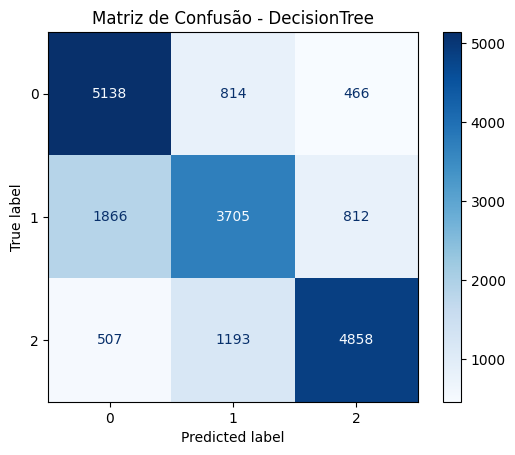

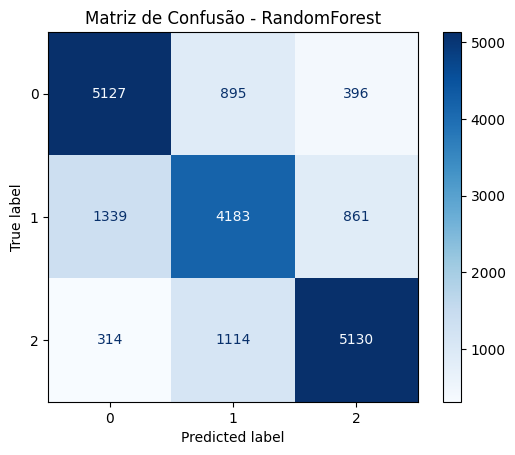

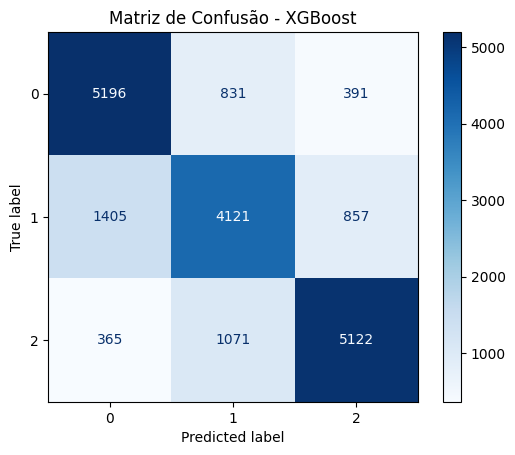

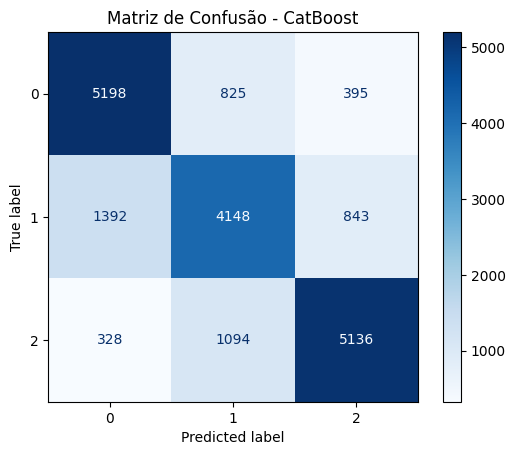

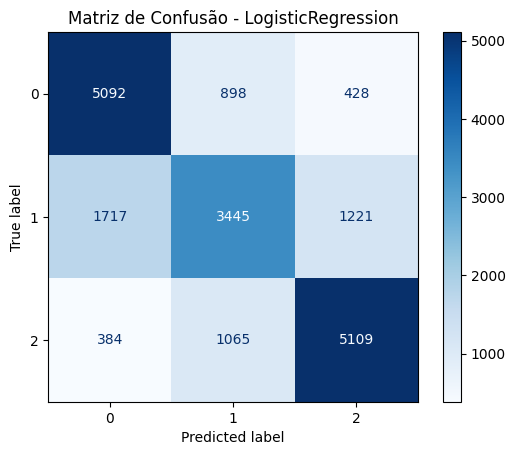

In [68]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 5. Análise da Importância das Features

In [69]:
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

## Carregando as features em um dataframe e gerando gráfico apenas com as features com importância > 0.0

In [70]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_test, y_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'LogisticRegression'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)


                 Feature  Importância  Desvio_Padrao              Modelo
0    ideb_2017_municipio     0.008936       0.000375        DecisionTree
1               rf_idade     0.006405       0.000295        DecisionTree
2       dias_atualizacao     0.006388       0.000299        DecisionTree
3     dias_cadastramento     0.006199       0.001771        DecisionTree
4           qtde_pessoas     0.046593       0.001608        DecisionTree
..                   ...          ...            ...                 ...
555                   RS     0.000861       0.000148  LogisticRegression
556                   MS     0.000379       0.000287  LogisticRegression
557                   MT     0.000981       0.000295  LogisticRegression
558                   GO     0.000758       0.000359  LogisticRegression
559                   DF    -0.000138       0.000024  LogisticRegression

[560 rows x 4 columns]


In [71]:
feature_importance_df.head()

Feature  Importância  Desvio_Padrao        Modelo
0  ideb_2017_municipio     0.008936       0.000375  DecisionTree
1             rf_idade     0.006405       0.000295  DecisionTree
2     dias_atualizacao     0.006388       0.000299  DecisionTree
3   dias_cadastramento     0.006199       0.001771  DecisionTree
4         qtde_pessoas     0.046593       0.001608  DecisionTree

In [72]:
# Filtrar apenas as features com importância > 0
feature_importance_df = feature_importance_df[feature_importance_df['Importância'] > 0.0]

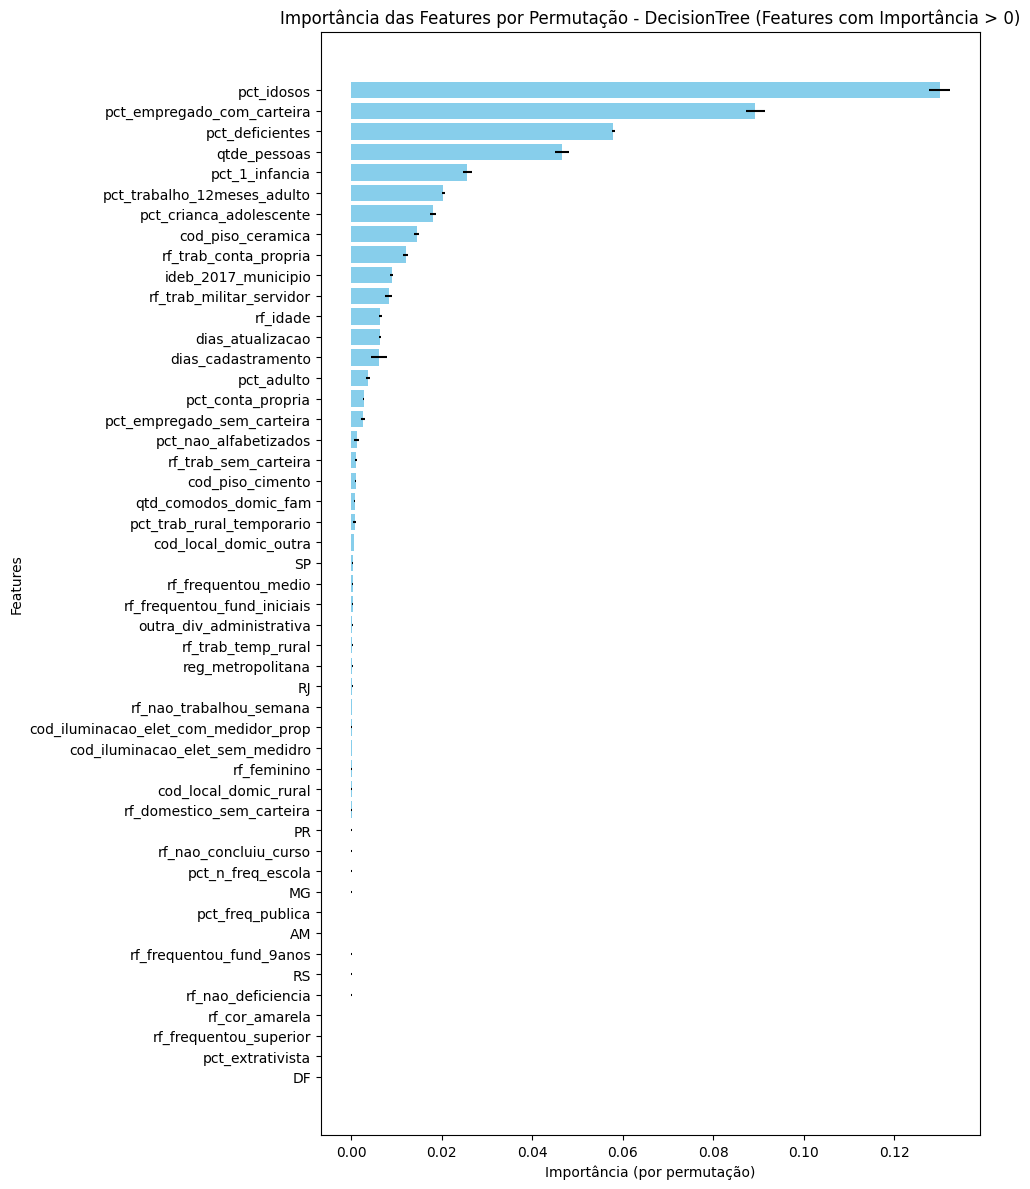

In [79]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df[feature_importance_df['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 12))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



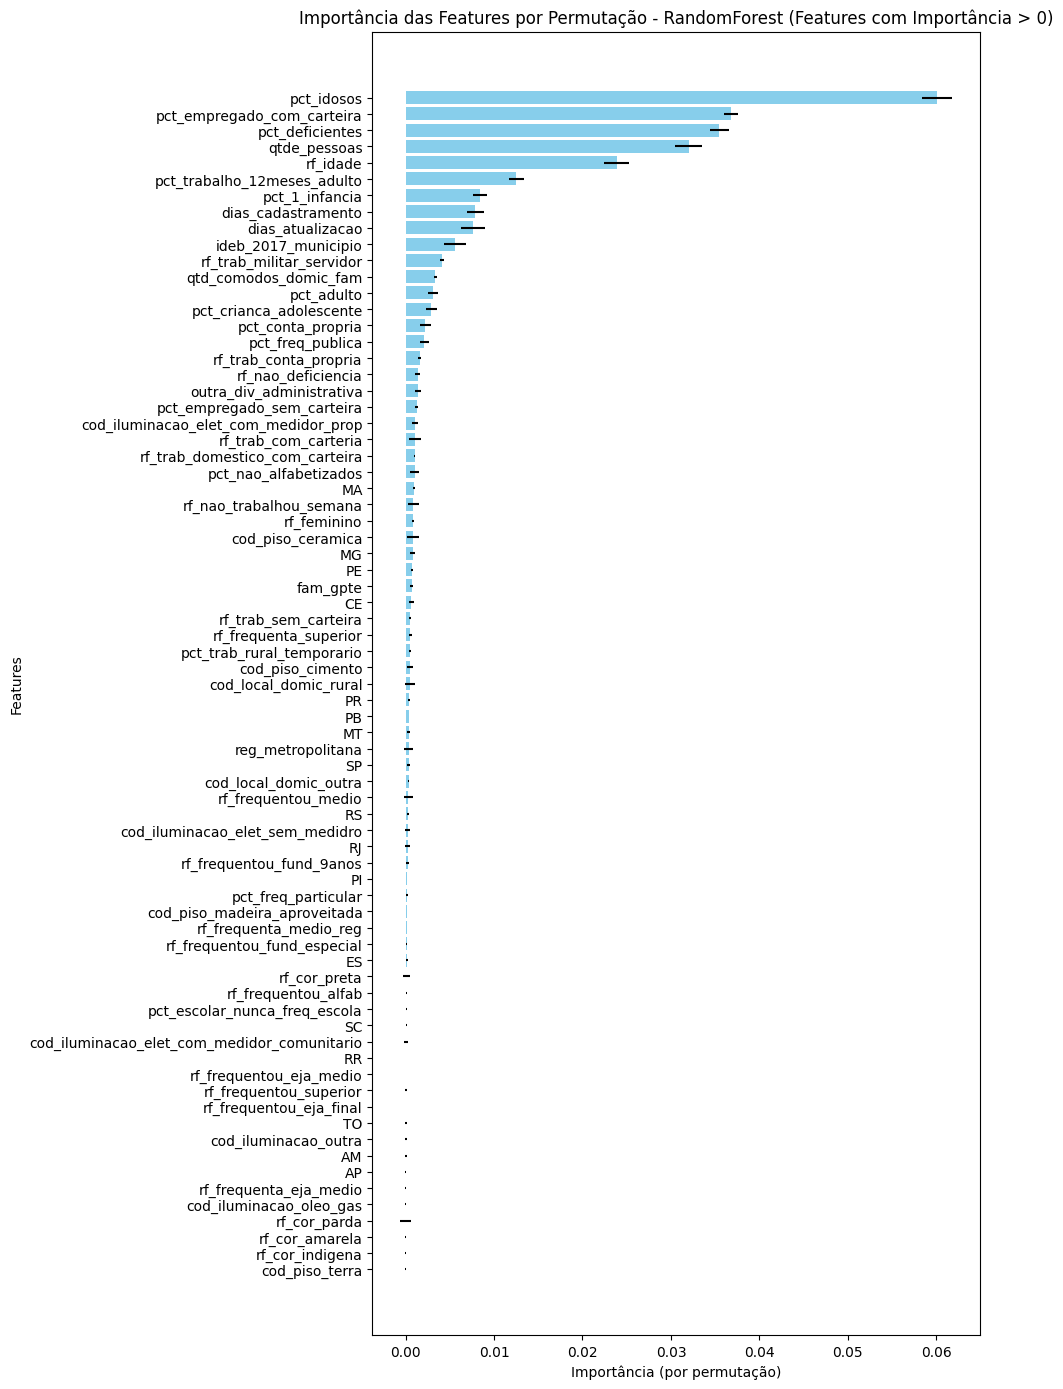

In [81]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 14))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


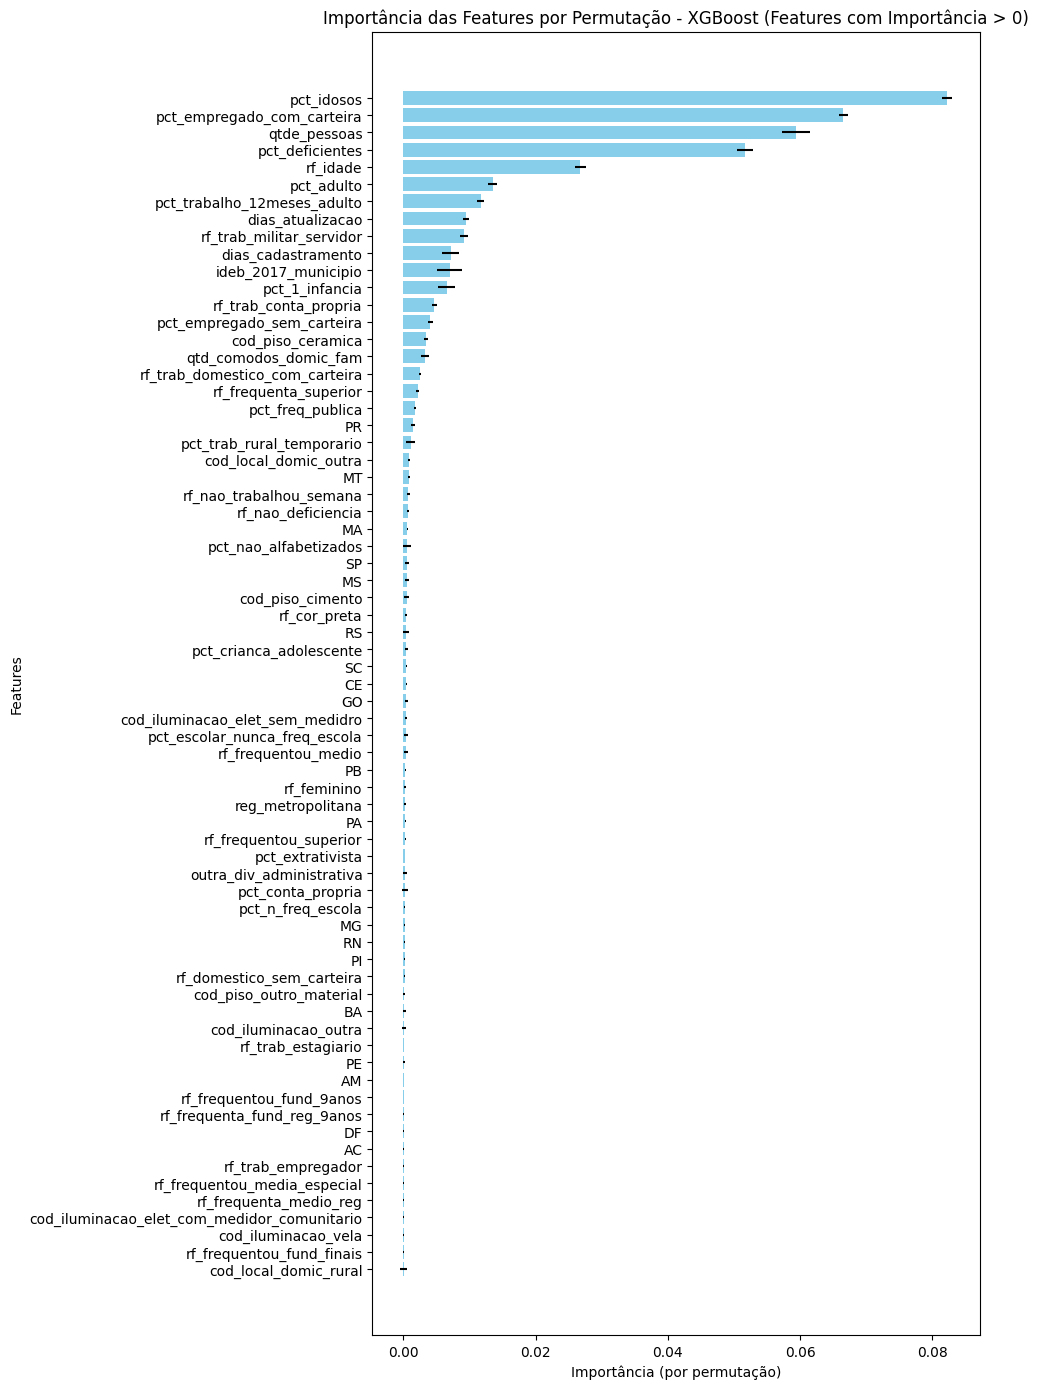

In [83]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 14))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


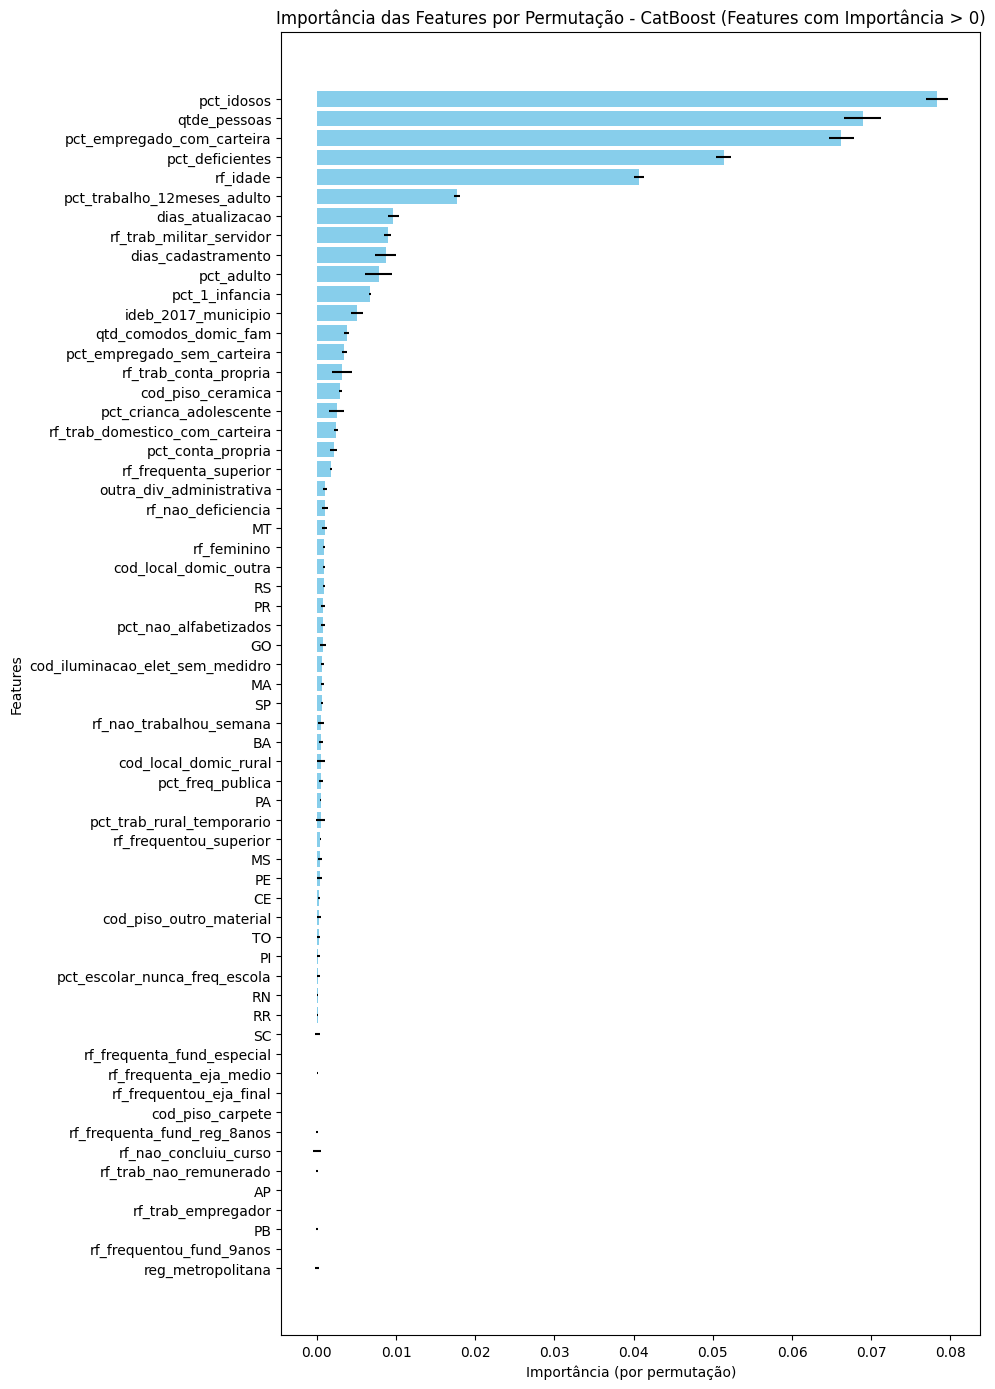

In [84]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


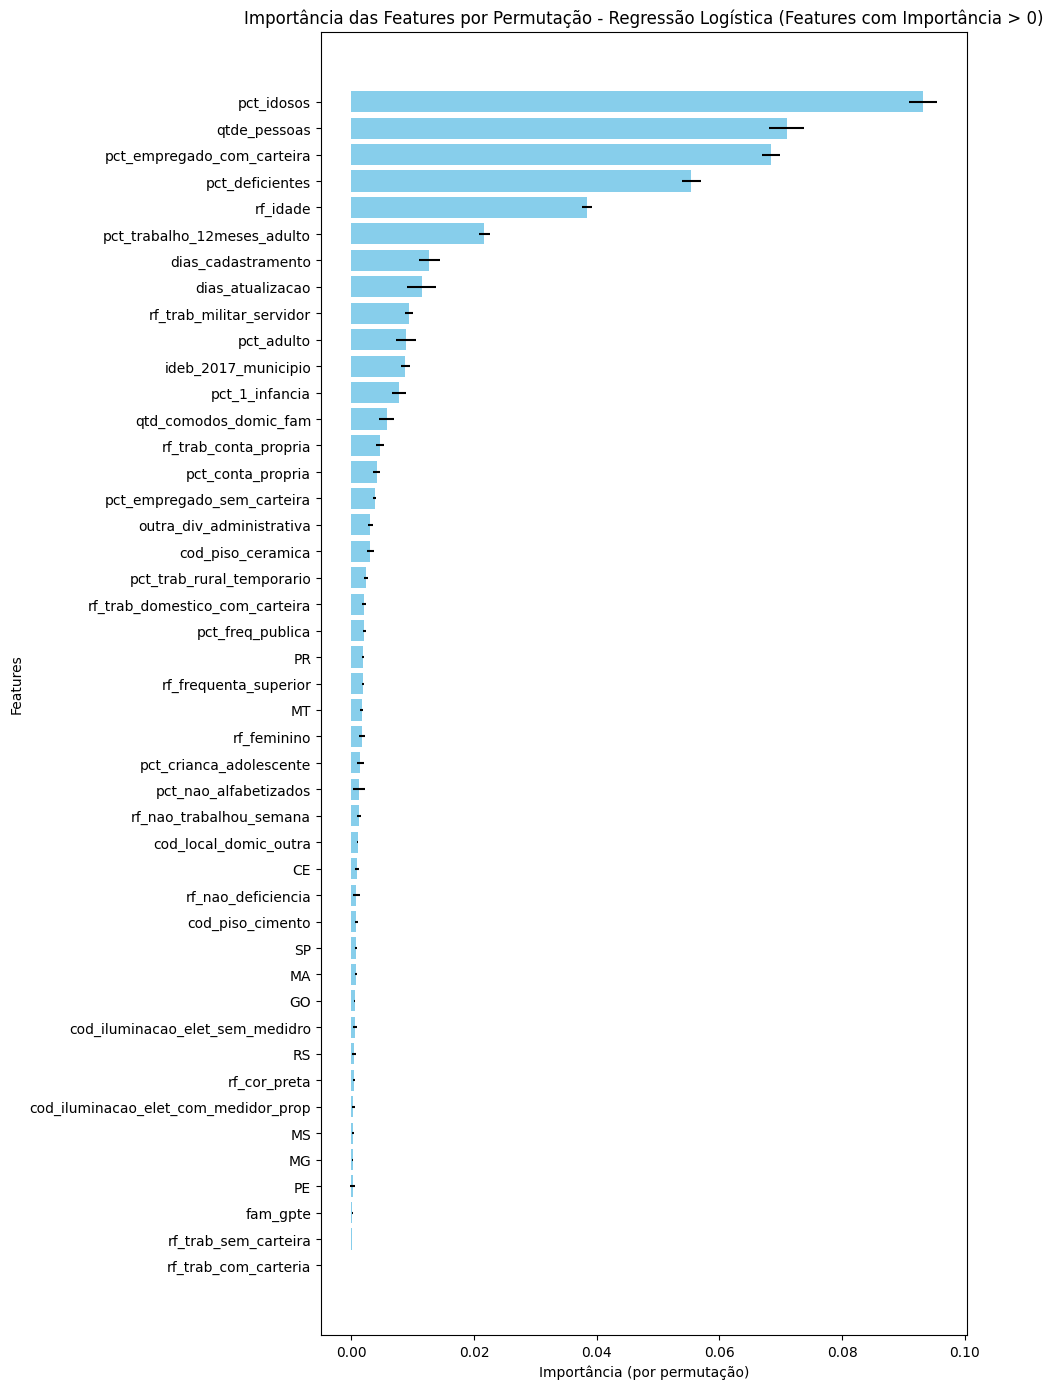

In [114]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'LogisticRegression']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - Regressão Logística (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [78]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree:

                    Feature  Importância
                 pct_idosos     0.130051
 pct_empregado_com_carteira     0.089330
            pct_deficientes     0.057923
               qtde_pessoas     0.046593
             pct_1_infancia     0.025638
pct_trabalho_12meses_adulto     0.020352
    pct_crianca_adolescente     0.018114
          cod_piso_ceramica     0.014446
      rf_trab_conta_propria     0.012053
        ideb_2017_municipio     0.008936

Top 10 Features para o modelo RandomForest:

                    Feature  Importância
                 pct_idosos     0.060075
 pct_empregado_com_carteira     0.036762
            pct_deficientes     0.035470
               qtde_pessoas     0.031992
                   rf_idade     0.023848
pct_trabalho_12meses_adulto     0.012535
             pct_1_infancia     0.008437
         dias_cadastramento     0.007869
           dias_atualizacao     0.007593
        ideb_2017_municipio     0.005579

Top 1

In [86]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Exibir as features com importância maior que a mediana para cada modelo
for model_name, important_features in important_features_per_model.items():
    print(f"\nFeatures com importância maior que a mediana para o modelo {model_name}:\n")
    print(important_features.to_string(index=False))



Features com importância maior que a mediana para o modelo DecisionTree:

                    Feature  Importância
        ideb_2017_municipio     0.008936
                   rf_idade     0.006405
           dias_atualizacao     0.006388
         dias_cadastramento     0.006199
               qtde_pessoas     0.046593
      qtd_comodos_domic_fam     0.000758
    pct_crianca_adolescente     0.018114
                 pct_adulto     0.003719
             pct_1_infancia     0.025638
            pct_deficientes     0.057923
                 pct_idosos     0.130051
      pct_nao_alfabetizados     0.001188
pct_trabalho_12meses_adulto     0.020352
 pct_empregado_com_carteira     0.089330
 pct_empregado_sem_carteira     0.002548
  pct_trab_rural_temporario     0.000758
          pct_conta_propria     0.002755
      rf_trab_conta_propria     0.012053
       rf_trab_sem_carteira     0.001016
   rf_trab_militar_servidor     0.008282
           cod_piso_cimento     0.000964
          cod_piso_cera

In [87]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Conjunto para consolidar todas as features importantes
consolidated_important_features = set()

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]
    
    # Adicionar as features importantes ao conjunto consolidado
    consolidated_important_features.update(important_features['Feature'])

# Exibir as features consolidadas acima da mediana para os modelos
print("Features consolidadas com importância acima da mediana em pelo menos um dos modelos:")
for feature in consolidated_important_features:
    print(feature)


Features consolidadas com importância acima da mediana em pelo menos um dos modelos:
pct_adulto
rf_idade
rf_feminino
cod_iluminacao_elet_sem_medidro
CE
pct_trab_rural_temporario
MT
rf_nao_deficiencia
MA
pct_1_infancia
dias_atualizacao
pct_empregado_sem_carteira
pct_trabalho_12meses_adulto
pct_empregado_com_carteira
fam_gpte
dias_cadastramento
PR
cod_piso_ceramica
cod_local_domic_outra
rf_cor_preta
rf_trab_conta_propria
rf_nao_trabalhou_semana
ideb_2017_municipio
RS
qtd_comodos_domic_fam
MS
cod_piso_cimento
outra_div_administrativa
SP
cod_iluminacao_elet_com_medidor_prop
pct_idosos
pct_conta_propria
rf_trab_militar_servidor
pct_freq_publica
rf_frequenta_superior
rf_trab_com_carteria
rf_trab_domestico_com_carteira
pct_nao_alfabetizados
pct_crianca_adolescente
GO
MG
pct_deficientes
PE
qtde_pessoas
rf_trab_sem_carteira


## Retirando as features que não tiveram importância acima da mediana de cada modelo

In [89]:
df_balanceado.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.500306      0.166667               0.142857   
1            0.268572      0.583333               0.238095   
2            0.297921      0.083333               0.238095   
3            0.121522      0.083333               0.285714   
4            0.879700      0.166667               0.285714   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_escolar_nunca_freq_escola  pct_freq_particular  \
0         0.0                            0.0                  0.0   
1         0.0                            0.0                  0.0   
2         0.0                            0.5                  0.0   
3         0.0                            0.0                  0.0   
4         0.0                            0.0                  0.0   

   pct_freq_publica  pct_n_freq_escola  pct_nao_alfabetizados  \
0          0.666667              0.000               0.333333   
1          0.375000              0.125               0.125000   
2          0.000000              0.000               0.000000   
3          0.000000              0.000               0.000000   
4          0.333333              0.000               0.000000   

   pct_trabalho_12meses_adulto  pct_militar_servidor  \
0                     0.333333                   0.0   
1                     0.000000                   0.0   
2                     0.500000                   0.0   
3                     0.500000                   0.0   
4                     0.333333                   0.0   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  pct_extrativista  fam_gpte  \
0                        0.0           0.333333               0.0       0.0   
1                        0.0           0.000000               0.0       0.0   
2                        0.0           0.500000               0.0       1.0   
3                        0.0           0.500000               0.5       0.0   
4                        0.0           0.333333               0.0       0.0   

   rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  \
0                      0.0          1.0                 1.0   
1                      1.0          1.0                 1.0   
2                      0.0          0.0                 1.0   
3                      0.0          1.0                 1.0   
4                      0.0          1.0                 1.0   

   rf_concluiu_curso  rf_nao_concluiu_curso  rf_cor_preta  rf_cor_amarela  \
0                0.0                    0.0           0.0             0.0   
1                0.0                    0.0           0.0             0.0   
2                0.0                    1.0           1.0             0.0   
3                0.0                    1.0           0.0             0.0   
4                0.0                  

In [90]:
df_balanceado.shape

(96791, 119)

In [92]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_nao_deficiencia', 'rf_concluiu_curso', 'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_curso_frequenta_3.0', 'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_

In [94]:
df_features_importance_1 = df_balanceado.drop(columns=['pct_escolar_nunca_freq_escola', 
                                            'pct_freq_particular', 'pct_n_freq_escola', 'pct_militar_servidor', 'pct_extrativista',  'rf_concluiu_curso', 
                                            'rf_nao_concluiu_curso', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_curso_frequenta_3.0', 
                                            'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg',
                                            'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio',
                                            'rf_frequenta_alfab_adulto', 'rf_curso_frequenta_14.0', 'rf_curso_frequentou_1.0', 'rf_frequentou_pre_escola',
                                            'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos', 
                                            'rf_frequentou_fund_especial', 'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 
                                            'rf_frequentou_eja_final', 'rf_frequentou_eja_medio', 'rf_frequentou_superior', 'rf_frequentou_alfab_aulto',
                                            'rf_frequentou_nenhum_curso', 'rf_trab_agricultura_sim', 'rf_trab_agricultura_nao', 'rf_trab_agricultura_nao_se_sabe', 
                                           'rf_trab_temp_rural', 'rf_domestico_sem_carteira', 
                                            'rf_trab_nao_remunerado', 'rf_trab_empregador', 'rf_trab_estagiario',
                                            'rf_trab_aprendiz', 'cod_iluminacao_elet_com_medidor_comunitario',
                                             'cod_iluminacao_oleo_gas', 'cod_iluminacao_vela', 'cod_iluminacao_outra', 'cod_piso_terra', 
                                             'cod_piso_madeira_aproveitada', 'cod_piso_madeira_aparelhada', 'cod_piso_carpete',
                                            'cod_piso_outro_material', 'cod_local_domic_rural', 'reg_metropolitana', 
                                            'AC', 'AM', 'RR', 'PA', 'AP', 'TO',  'PI', 'RN', 'PB', 'AL', 'SE', 'BA', 'ES', 'RJ',  'SC',
                                             'DF'])

In [95]:
df_features_importance_1.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.500306      0.166667               0.142857   
1            0.268572      0.583333               0.238095   
2            0.297921      0.083333               0.238095   
3            0.121522      0.083333               0.285714   
4            0.879700      0.166667               0.285714   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_freq_publica  pct_nao_alfabetizados  \
0         0.0          0.666667               0.333333   
1         0.0          0.375000               0.125000   
2         0.0          0.000000               0.000000   
3         0.0          0.000000               0.000000   
4         0.0          0.333333               0.000000   

   pct_trabalho_12meses_adulto  pct_empregado_com_carteira  \
0                     0.333333                         0.0   
1                     0.000000                         0.0   
2                     0.500000                         0.0   
3                     0.500000                         0.0   
4                     0.333333                         0.0   

   pct_empregado_sem_carteira  pct_trab_rural_temporario  pct_conta_propria  \
0                         0.0                        0.0           0.333333   
1                         0.0                        0.0           0.000000   
2                         0.0                        0.0           0.500000   
3                         0.0                        0.0           0.500000   
4                         0.0                        0.0           0.333333   

   fam_gpte  rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  \
0       0.0                      0.0          1.0                 1.0   
1       0.0                      1.0          1.0                 1.0   
2       1.0                      0.0          0.0                 1.0   
3       0.0                      0.0          1.0                 1.0   
4       0.0                      0.0          1.0                 1.0   

   rf_cor_preta  rf_frequenta_superior  rf_trab_conta_propria  \
0           0.0                    0.0                    1.0   
1           0.0                    0.0                    0.0   
2           1.0                    0.0                    1.0   
3           0.0                    0.0                    1.0   
4           0.0                    0.0                    1.0   

   rf_trab_sem_carteira  rf_trab_com_carteria  rf_trab_domestico_com_carteira  \
0                   0.0                   0.0                             0.0   
1                   0.0                   0.0                             0.0   
2                   0.0                   0.0                             0.0   
3                   0.0                   0.0                             0.0   
4                   0.0                   0.0                             0.0   

   rf_trab_militar_servidor  cod_iluminacao_elet_com_medidor_prop  \
0                       0.0                                   1.0   
1                       0.0                                   1.0   
2                       0.0                                   1.0 

In [96]:
df_features_importance_1.columns

Index(['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       'pct_deficientes', 'pct_idosos', 'pct_freq_publica',
       'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto',
       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira',
       'pct_trab_rural_temporario', 'pct_conta_propria', 'fam_gpte',
       'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_nao_deficiencia',
       'rf_cor_preta', 'rf_frequenta_superior', 'rf_trab_conta_propria',
       'rf_trab_sem_carteira', 'rf_trab_com_carteria',
       'rf_trab_domestico_com_carteira', 'rf_trab_militar_servidor',
       'cod_iluminacao_elet_com_medidor_prop',
       'cod_iluminacao_elet_sem_medidro', 'cod_piso_cimento',
       'cod_piso_ceramica', 'cod_local_domic_outra',
       'outra_div_administrativa', 'MA', 'CE', 'PE', 'MG', 'SP', 'PR', 'RS',
       'MS', 'MT', 'GO

## Dividindo as features e a variável target

In [98]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_features_importance_1[[ 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       'pct_deficientes', 'pct_idosos', 'pct_freq_publica',
       'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto',
       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira',
       'pct_trab_rural_temporario', 'pct_conta_propria', 'fam_gpte',
       'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_nao_deficiencia',
       'rf_cor_preta', 'rf_frequenta_superior', 'rf_trab_conta_propria',
       'rf_trab_sem_carteira', 'rf_trab_com_carteria',
       'rf_trab_domestico_com_carteira', 'rf_trab_militar_servidor',
       'cod_iluminacao_elet_com_medidor_prop',
       'cod_iluminacao_elet_sem_medidro', 'cod_piso_cimento',
       'cod_piso_ceramica', 'cod_local_domic_outra',
       'outra_div_administrativa', 'MA', 'CE', 'PE', 'MG', 'SP', 'PR', 'RS',
       'MS', 'MT', 'GO']]
y = df_features_importance_1['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 45)


ideb_2017_municipio  rf_idade  dias_atualizacao  dias_cadastramento  \
0             0.574257  0.294118          0.331317            0.500306   
1             0.554455  0.235294          0.056452            0.268572   
2             0.495050  0.166667          0.390457            0.297921   
3             0.514851  0.401961          0.180108            0.121522   
4             0.554455  0.362745          0.385753            0.879700   

   qtde_pessoas  qtd_comodos_domic_fam  pct_crianca_adolescente  pct_adulto  \
0      0.166667               0.142857                 0.666667    0.333333   
1      0.583333               0.238095                 0.375000    0.250000   
2      0.083333               0.238095                 0.500000    0.500000   
3      0.083333               0.285714                 0.000000    0.500000   
4      0.166667               0.285714                 0.000000    0.666667   

   pct_1_infancia  pct_deficientes  pct_idosos  pct_freq_publica  \
0        0.000000            0.000         0.0          0.666667   
1        0.375000            0.375         0.0          0.375000   
2        0.000000            0.000         0.0          0.000000   
3        0.500000            0.000         0.0          0.000000   
4        0.333333            0.000         0.0          0.333333   

   pct_nao_alfabetizados  pct_trabalho_12meses_adulto  \
0               0.333333                     0.333333   
1               0.125000                     0.000000   
2               0.000000                     0.500000   
3               0.000000                     0.500000   
4               0.000000                     0.333333   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  fam_gpte  \
0                        0.0           0.333333       0.0   
1                        0.0           0.000000       0.0   
2                        0.0           0.500000       1.0   
3                        0.0           0.500000       0.0   
4                        0.0           0.333333       0.0   

   rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  rf_cor_preta  \
0                      0.0          1.0                 1.0           0.0   
1                      1.0          1.0                 1.0           0.0   
2                      0.0          0.0                 1.0           1.0   
3                      0.0          1.0                 1.0           0.0   
4                      0.0          1.0                 1.0           0.0   

   rf_frequenta_superior  rf_trab_conta_propria  rf_trab_sem_carteira  \
0                    0.0                    1.0                   0.0   
1                    0.0                    0.0                   0.0   
2                    0.0                    1.0                   0.0   
3                    0.0                    1.0                   0.0   
4                    0.0                    1.0                   0.0   

   rf_trab_com_carteria  rf_trab_domestico_com_carteira  \
0                   0.0                             0.0   
1                   0.0                             0.0   
2                   0.0                             0.0   
3                   0.0                             0.0   
4                   0.0                             0.0   

   rf_trab_militar_servidor  cod_iluminacao_elet_com_medidor_prop  \
0                       0.0                                   1.0   
1                       0.0                                   1.0   
2                       0.0                                   1.0   
3                       0.0                                   1.

In [99]:
X.describe()

ideb_2017_municipio      rf_idade  dias_atualizacao  \
count         96791.000000  96791.000000      96791.000000   
mean              0.644668      0.305648          0.275014   
std               0.094818      0.167192          0.225215   
min               0.000000      0.000000          0.000000   
25%               0.574257      0.166667          0.096774   
50%               0.653465      0.284314          0.223790   
75%               0.722772      0.441176          0.378360   
max               1.000000      1.000000          1.000000   

       dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
count        96791.000000  96791.000000           96791.000000   
mean             0.335218      0.121919               0.252524   
std              0.303373      0.112737               0.083483   
min              0.000000      0.000000               0.000000   
25%              0.065882      0.000000               0.238095   
50%              0.231122      0.083333               0.285714   
75%              0.571691      0.166667               0.285714   
max              1.000000      1.000000               1.000000   

       pct_crianca_adolescente    pct_adulto  pct_1_infancia  pct_deficientes  \
count             96791.000000  96791.000000    96791.000000     96791.000000   
mean                  0.152479      0.518294        0.105183         0.097664   
std                   0.226163      0.350732        0.187206         0.251617   
min                   0.000000      0.000000        0.000000         0.000000   
25%                   0.000000      0.333333        0.000000         0.000000   
50%                   0.000000      0.500000        0.000000         0.000000   
75%                   0.333333      1.000000        0.200000         0.000000   
max                   1.000000      1.000000        0.833333         1.000000   

         pct_idosos  pct_freq_publica  pct_nao_alfabetizados  \
count  96791.000000      96791.000000           96791.000000   
mean       0.224044          0.157848               0.132312   
std        0.387923          0.231469               0.291689   
min        0.000000          0.000000               0.000000   
25%        0.000000          0.000000               0.000000   
50%        0.000000          0.000000               0.000000   
75%        0.333333          0.333333               0.000000   
max        1.000000          1.000000               1.000000   

       pct_trabalho_12meses_adulto  pct_empregado_com_carteira  \
count                 96791.000000                96791.000000   
mean                      0.244202                    0.059378   
std                       0.308073                    0.172408   
min                       0.000000                    0.000000   
25%                       0.000000                    0.000000   
50%                       0.000000                    0.000000   
75%                       0.500000                    0.000000   
max                       1.000000                    1.000000   

       pct_empregado_sem_carteira  pct_trab_rural_temporario  \
count                96791.000000               96791.000000   
mean                     0.008916                   0.019903   
std                      0.072321                   0.107518   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      1.000000                   1.000000   

       pct_conta_propria      fam_gpte  rf_nao_trabalhou_semana   rf_feminino  \
count       96791.000000  96791.000000             96791.000000  96791.000000   
mean            0.120513      0.101404                 0.657933      0.799744   
std             0.246542      0.301865                 0.474404      0.400194   
min             0.000000      0.000000            

In [101]:
X.isnull().sum().sum()

0

In [102]:
y.isnull().sum()

0

In [103]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Fazendo a avaliação usando apenas as features mais importantes

In [104]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [6, 7, 9],
            'classifier__min_samples_split': [2, 3, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'classifier__C': [1, 10, 100],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    }
}

In [105]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 9, 'classifier__min_samples_split': 3}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}
Melhores hiperparâmetros para LogisticRegression: {'classifier__C': 100, 'classifier__solver': 'lbfgs'}


In [106]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo: DecisionTree
  F1 Score: 0.71
  Acurácia: 0.71
Modelo: RandomForest
  F1 Score: 0.74
  Acurácia: 0.75
Modelo: XGBoost
  F1 Score: 0.74
  Acurácia: 0.74
Modelo: CatBoost
  F1 Score: 0.75
  Acurácia: 0.75
Modelo: LogisticRegression
  F1 Score: 0.69
  Acurácia: 0.70


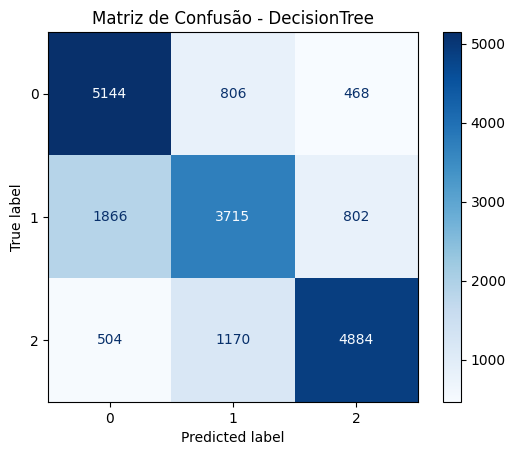

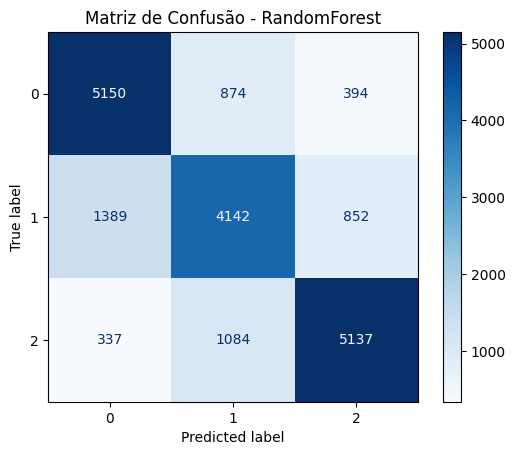

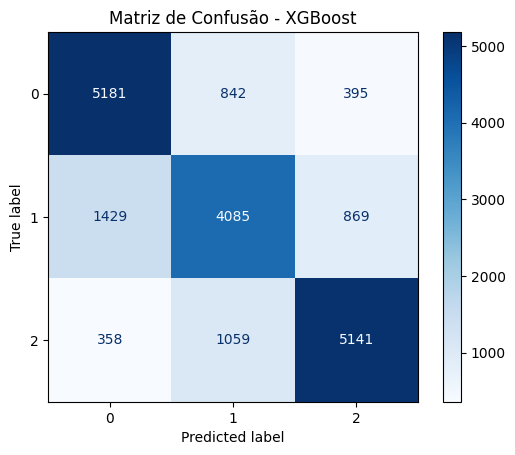

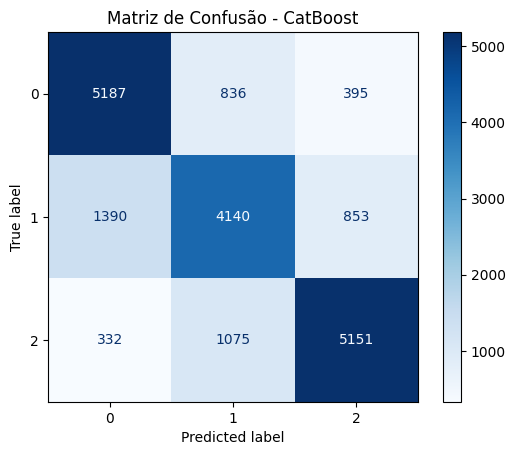

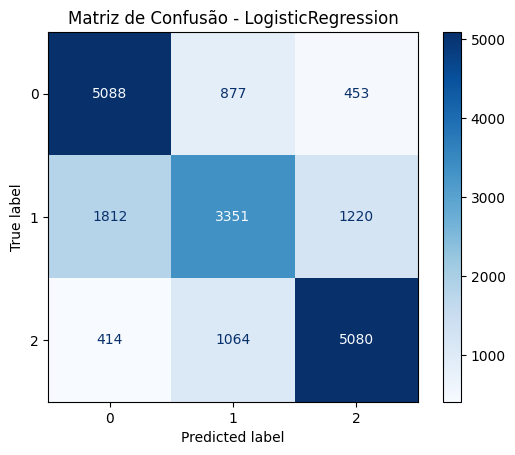

In [107]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

In [108]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_test, y_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'LogisticRegression'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)

                 Feature  Importância  Desvio_Padrao              Modelo
0    ideb_2017_municipio     0.007025       0.000146        DecisionTree
1               rf_idade     0.004804       0.000365        DecisionTree
2       dias_atualizacao     0.006509       0.000655        DecisionTree
3     dias_cadastramento     0.006698       0.001246        DecisionTree
4           qtde_pessoas     0.046800       0.001650        DecisionTree
..                   ...          ...            ...                 ...
220                   PR     0.001928       0.000216  LogisticRegression
221                   RS     0.000482       0.000317  LogisticRegression
222                   MS     0.000293       0.000160  LogisticRegression
223                   MT     0.001722       0.000244  LogisticRegression
224                   GO     0.000585       0.000106  LogisticRegression

[225 rows x 4 columns]


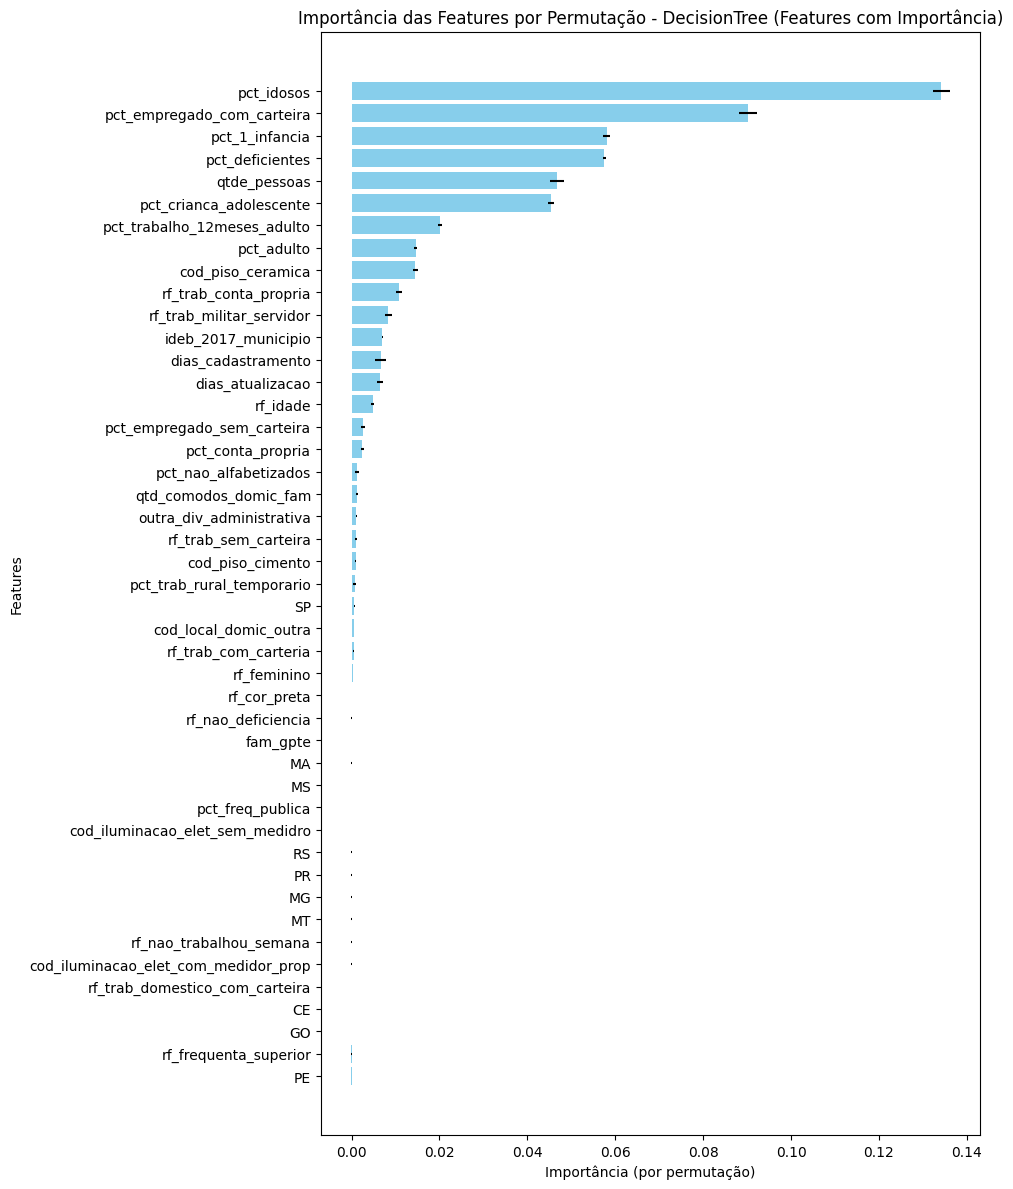

In [110]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df[feature_importance_df['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 12))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

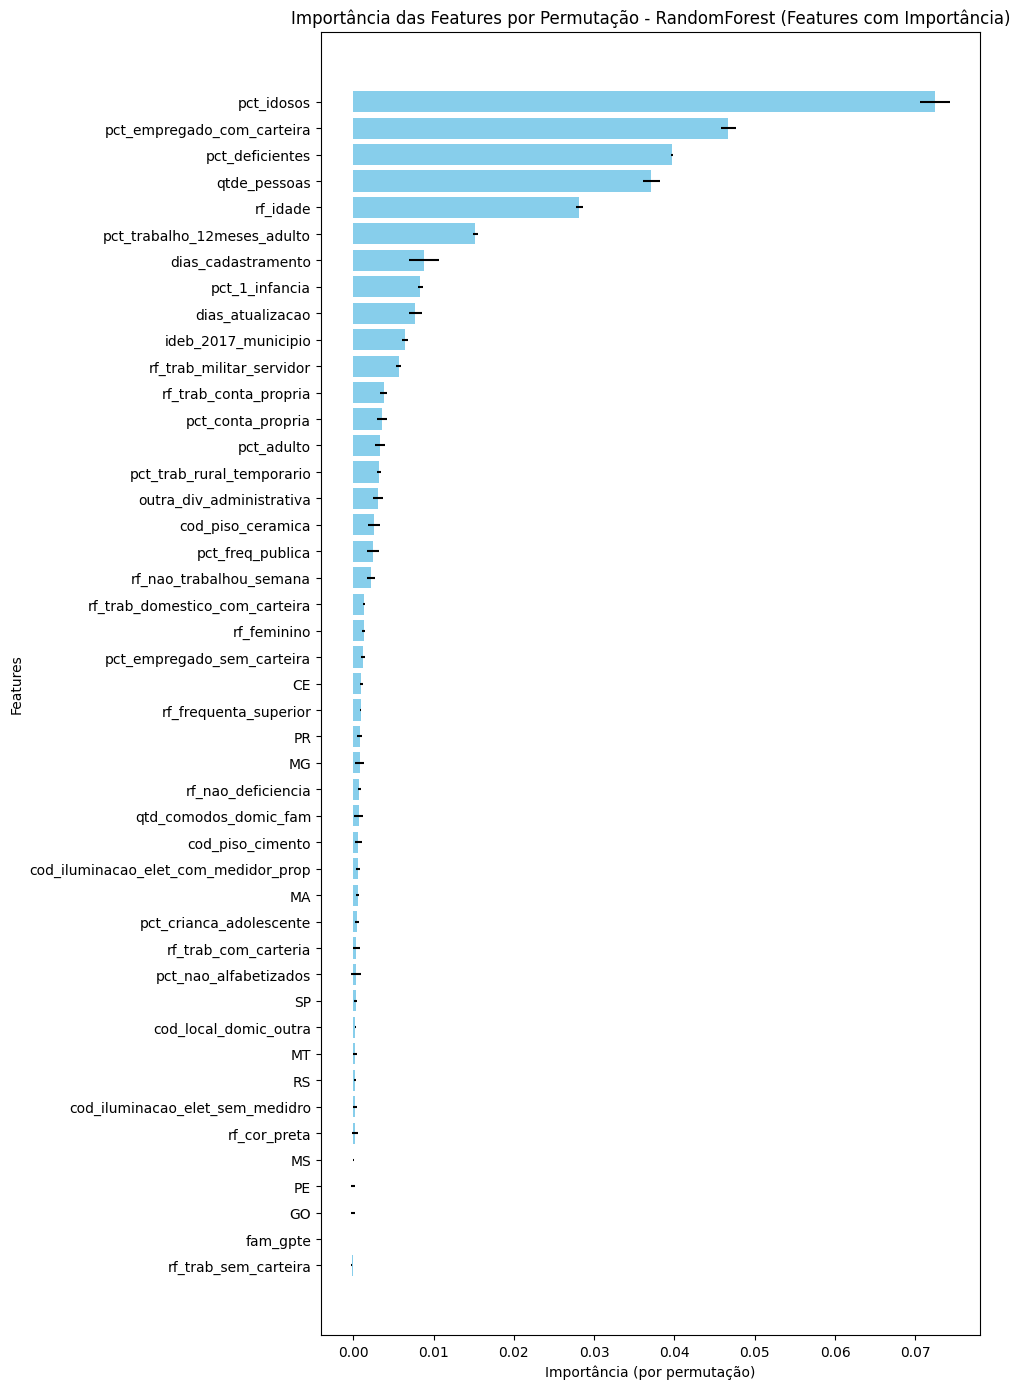

In [111]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 14))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

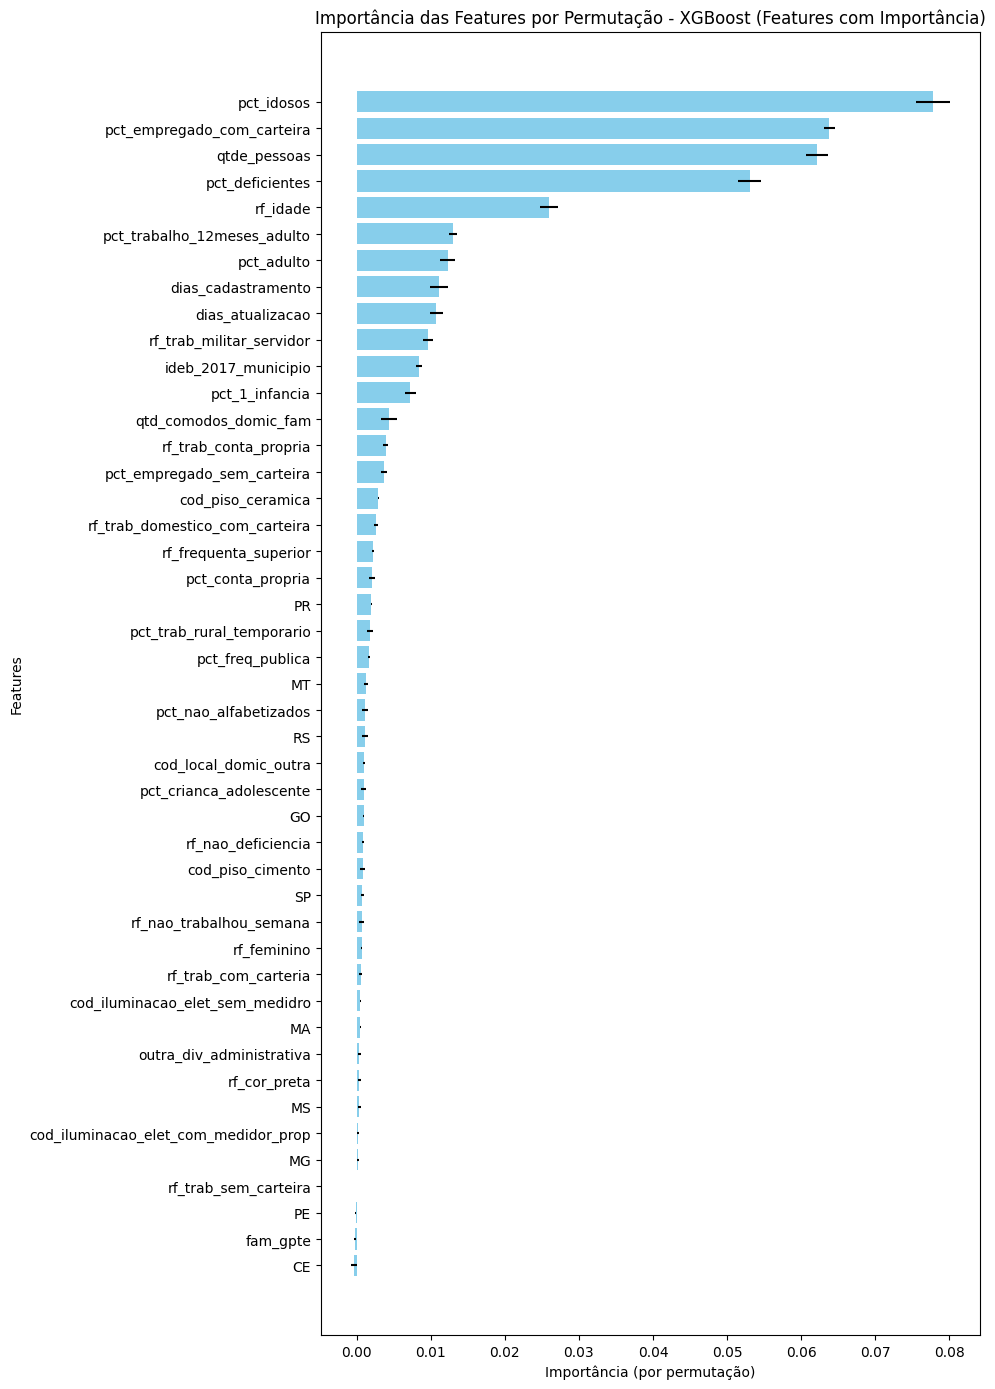

In [112]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 14))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

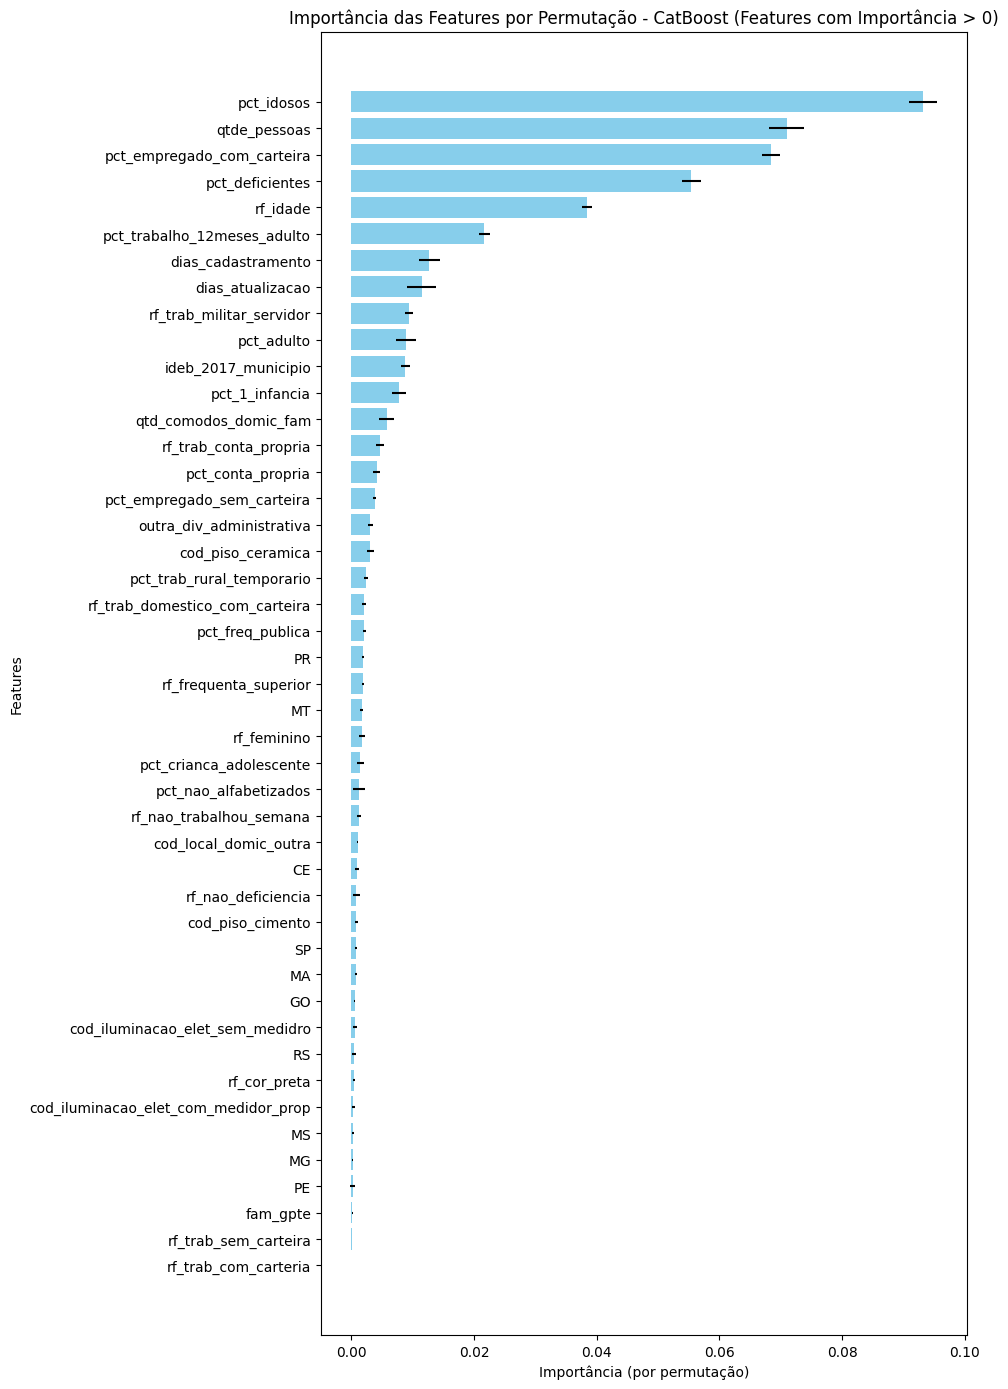

In [115]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

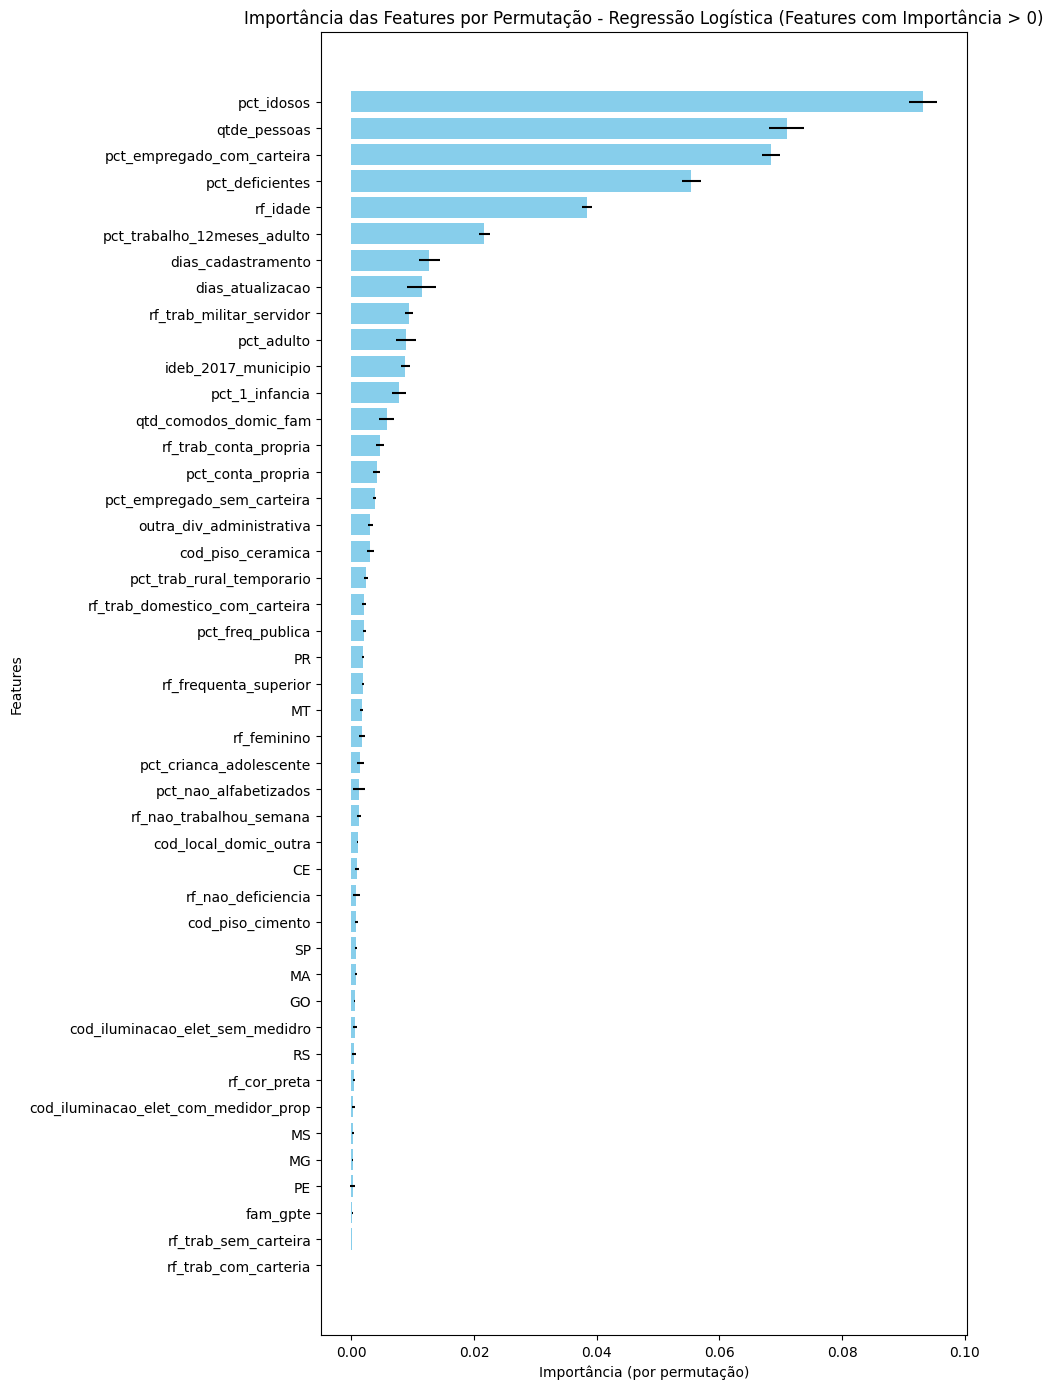

In [113]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'LogisticRegression']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - Regressão Logística (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [116]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Exibir as features com importância maior que a mediana para cada modelo
for model_name, important_features in important_features_per_model.items():
    print(f"\nFeatures com importância maior que a mediana para o modelo {model_name}:\n")
    print(important_features.to_string(index=False))


Features com importância maior que a mediana para o modelo DecisionTree:

                    Feature  Importância
        ideb_2017_municipio     0.007025
                   rf_idade     0.004804
           dias_atualizacao     0.006509
         dias_cadastramento     0.006698
               qtde_pessoas     0.046800
      qtd_comodos_domic_fam     0.001240
    pct_crianca_adolescente     0.045422
                 pct_adulto     0.014601
             pct_1_infancia     0.058009
            pct_deficientes     0.057475
                 pct_idosos     0.134201
      pct_nao_alfabetizados     0.001291
pct_trabalho_12meses_adulto     0.020128
 pct_empregado_com_carteira     0.090242
 pct_empregado_sem_carteira     0.002548
          pct_conta_propria     0.002497
      rf_trab_conta_propria     0.010744
       rf_trab_sem_carteira     0.000999
   rf_trab_militar_servidor     0.008317
           cod_piso_cimento     0.000947
          cod_piso_ceramica     0.014515
   outra_div_administra

In [117]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Conjunto para consolidar todas as features importantes
consolidated_important_features = set()

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]
    
    # Adicionar as features importantes ao conjunto consolidado
    consolidated_important_features.update(important_features['Feature'])

# Exibir as features consolidadas acima da mediana para os modelos
print("Features consolidadas com importância acima da mediana em pelo menos um dos modelos:")
for feature in consolidated_important_features:
    print(feature)

Features consolidadas com importância acima da mediana em pelo menos um dos modelos:
pct_adulto
rf_idade
rf_feminino
pct_trab_rural_temporario
pct_1_infancia
dias_atualizacao
pct_empregado_sem_carteira
pct_trabalho_12meses_adulto
pct_empregado_com_carteira
dias_cadastramento
PR
cod_piso_ceramica
rf_trab_conta_propria
rf_nao_trabalhou_semana
ideb_2017_municipio
qtd_comodos_domic_fam
cod_piso_cimento
outra_div_administrativa
pct_idosos
pct_conta_propria
rf_trab_militar_servidor
pct_freq_publica
rf_trab_domestico_com_carteira
rf_frequenta_superior
pct_nao_alfabetizados
pct_crianca_adolescente
pct_deficientes
qtde_pessoas
rf_trab_sem_carteira


## Retirando as features com importância abaixo da mediana

In [118]:
df_features_importance_1.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.500306      0.166667               0.142857   
1            0.268572      0.583333               0.238095   
2            0.297921      0.083333               0.238095   
3            0.121522      0.083333               0.285714   
4            0.879700      0.166667               0.285714   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_freq_publica  pct_nao_alfabetizados  \
0         0.0          0.666667               0.333333   
1         0.0          0.375000               0.125000   
2         0.0          0.000000               0.000000   
3         0.0          0.000000               0.000000   
4         0.0          0.333333               0.000000   

   pct_trabalho_12meses_adulto  pct_empregado_com_carteira  \
0                     0.333333                         0.0   
1                     0.000000                         0.0   
2                     0.500000                         0.0   
3                     0.500000                         0.0   
4                     0.333333                         0.0   

   pct_empregado_sem_carteira  pct_trab_rural_temporario  pct_conta_propria  \
0                         0.0                        0.0           0.333333   
1                         0.0                        0.0           0.000000   
2                         0.0                        0.0           0.500000   
3                         0.0                        0.0           0.500000   
4                         0.0                        0.0           0.333333   

   fam_gpte  rf_nao_trabalhou_semana  rf_feminino  rf_nao_deficiencia  \
0       0.0                      0.0          1.0                 1.0   
1       0.0                      1.0          1.0                 1.0   
2       1.0                      0.0          0.0                 1.0   
3       0.0                      0.0          1.0                 1.0   
4       0.0                      0.0          1.0                 1.0   

   rf_cor_preta  rf_frequenta_superior  rf_trab_conta_propria  \
0           0.0                    0.0                    1.0   
1           0.0                    0.0                    0.0   
2           1.0                    0.0                    1.0   
3           0.0                    0.0                    1.0   
4           0.0                    0.0                    1.0   

   rf_trab_sem_carteira  rf_trab_com_carteria  rf_trab_domestico_com_carteira  \
0                   0.0                   0.0                             0.0   
1                   0.0                   0.0                             0.0   
2                   0.0                   0.0                             0.0   
3                   0.0                   0.0                             0.0   
4                   0.0                   0.0                             0.0   

   rf_trab_militar_servidor  cod_iluminacao_elet_com_medidor_prop  \
0                       0.0                                   1.0   
1                       0.0                                   1.0   
2                       0.0                                   1.0 

In [119]:
df_features_importance_1.columns

Index(['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       'pct_deficientes', 'pct_idosos', 'pct_freq_publica',
       'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto',
       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira',
       'pct_trab_rural_temporario', 'pct_conta_propria', 'fam_gpte',
       'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_nao_deficiencia',
       'rf_cor_preta', 'rf_frequenta_superior', 'rf_trab_conta_propria',
       'rf_trab_sem_carteira', 'rf_trab_com_carteria',
       'rf_trab_domestico_com_carteira', 'rf_trab_militar_servidor',
       'cod_iluminacao_elet_com_medidor_prop',
       'cod_iluminacao_elet_sem_medidro', 'cod_piso_cimento',
       'cod_piso_ceramica', 'cod_local_domic_outra',
       'outra_div_administrativa', 'MA', 'CE', 'PE', 'MG', 'SP', 'PR', 'RS',
       'MS', 'MT', 'GO

In [120]:
df_features_importance_2 = df_features_importance_1.drop(columns=[   
                'fam_gpte', 'rf_nao_deficiencia', 'rf_cor_preta',
       'rf_trab_com_carteria',        
       'cod_iluminacao_elet_com_medidor_prop',
       'cod_iluminacao_elet_sem_medidro', 'cod_local_domic_outra',
        'MA', 'CE', 'PE', 'MG', 'SP',  'RS',
       'MS', 'MT', 'GO'])

In [121]:
df_features_importance_2.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.500306      0.166667               0.142857   
1            0.268572      0.583333               0.238095   
2            0.297921      0.083333               0.238095   
3            0.121522      0.083333               0.285714   
4            0.879700      0.166667               0.285714   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_freq_publica  pct_nao_alfabetizados  \
0         0.0          0.666667               0.333333   
1         0.0          0.375000               0.125000   
2         0.0          0.000000               0.000000   
3         0.0          0.000000               0.000000   
4         0.0          0.333333               0.000000   

   pct_trabalho_12meses_adulto  pct_empregado_com_carteira  \
0                     0.333333                         0.0   
1                     0.000000                         0.0   
2                     0.500000                         0.0   
3                     0.500000                         0.0   
4                     0.333333                         0.0   

   pct_empregado_sem_carteira  pct_trab_rural_temporario  pct_conta_propria  \
0                         0.0                        0.0           0.333333   
1                         0.0                        0.0           0.000000   
2                         0.0                        0.0           0.500000   
3                         0.0                        0.0           0.500000   
4                         0.0                        0.0           0.333333   

   rf_nao_trabalhou_semana  rf_feminino  rf_frequenta_superior  \
0                      0.0          1.0                    0.0   
1                      1.0          1.0                    0.0   
2                      0.0          0.0                    0.0   
3                      0.0          1.0                    0.0   
4                      0.0          1.0                    0.0   

   rf_trab_conta_propria  rf_trab_sem_carteira  \
0                    1.0                   0.0   
1                    0.0                   0.0   
2                    1.0                   0.0   
3                    1.0                   0.0   
4                    1.0                   0.0   

   rf_trab_domestico_com_carteira  rf_trab_militar_servidor  cod_piso_cimento  \
0                             0.0                       0.0               1.0   
1                             0.0                       0.0               1.0   
2                             0.0                       0.0               1.0   
3                             0.0                       0.0               1.0   
4                             0.0                       0.0               0.0   

   cod_piso_ceramica  outra_div_administrativa   PR  classe_renda  
0                0.0                       0.0  0.0             0  
1                0.0                       1.0  0.0             0  
2                0.0                       1.0  0.0             0  
3                0.0                       1.0  0.0             0  
4                1.0                       1.0  0.0             0

In [123]:
df_features_importance_2.isnull().sum().sum()

0

In [124]:
df_features_importance_2.columns

Index(['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       'pct_deficientes', 'pct_idosos', 'pct_freq_publica',
       'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto',
       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira',
       'pct_trab_rural_temporario', 'pct_conta_propria',
       'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_frequenta_superior',
       'rf_trab_conta_propria', 'rf_trab_sem_carteira',
       'rf_trab_domestico_com_carteira', 'rf_trab_militar_servidor',
       'cod_piso_cimento', 'cod_piso_ceramica', 'outra_div_administrativa',
       'PR', 'classe_renda'],
      dtype='object')

In [125]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_features_importance_2[[ 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       'pct_deficientes', 'pct_idosos', 'pct_freq_publica',
       'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto',
       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira',
       'pct_trab_rural_temporario', 'pct_conta_propria',
       'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_frequenta_superior',
       'rf_trab_conta_propria', 'rf_trab_sem_carteira',
       'rf_trab_domestico_com_carteira', 'rf_trab_militar_servidor',
       'cod_piso_cimento', 'cod_piso_ceramica', 'outra_div_administrativa',
       'PR']]
y = df_features_importance_2['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 29)


ideb_2017_municipio  rf_idade  dias_atualizacao  dias_cadastramento  \
0             0.574257  0.294118          0.331317            0.500306   
1             0.554455  0.235294          0.056452            0.268572   
2             0.495050  0.166667          0.390457            0.297921   
3             0.514851  0.401961          0.180108            0.121522   
4             0.554455  0.362745          0.385753            0.879700   

   qtde_pessoas  qtd_comodos_domic_fam  pct_crianca_adolescente  pct_adulto  \
0      0.166667               0.142857                 0.666667    0.333333   
1      0.583333               0.238095                 0.375000    0.250000   
2      0.083333               0.238095                 0.500000    0.500000   
3      0.083333               0.285714                 0.000000    0.500000   
4      0.166667               0.285714                 0.000000    0.666667   

   pct_1_infancia  pct_deficientes  pct_idosos  pct_freq_publica  \
0        0.000000            0.000         0.0          0.666667   
1        0.375000            0.375         0.0          0.375000   
2        0.000000            0.000         0.0          0.000000   
3        0.500000            0.000         0.0          0.000000   
4        0.333333            0.000         0.0          0.333333   

   pct_nao_alfabetizados  pct_trabalho_12meses_adulto  \
0               0.333333                     0.333333   
1               0.125000                     0.000000   
2               0.000000                     0.500000   
3               0.000000                     0.500000   
4               0.000000                     0.333333   

   pct_empregado_com_carteira  pct_empregado_sem_carteira  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   pct_trab_rural_temporario  pct_conta_propria  rf_nao_trabalhou_semana  \
0                        0.0           0.333333                      0.0   
1                        0.0           0.000000                      1.0   
2                        0.0           0.500000                      0.0   
3                        0.0           0.500000                      0.0   
4                        0.0           0.333333                      0.0   

   rf_feminino  rf_frequenta_superior  rf_trab_conta_propria  \
0          1.0                    0.0                    1.0   
1          1.0                    0.0                    0.0   
2          0.0                    0.0                    1.0   
3          1.0                    0.0                    1.0   
4          1.0                    0.0                    1.0   

   rf_trab_sem_carteira  rf_trab_domestico_com_carteira  \
0                   0.0                             0.0   
1                   0.0                             0.0   
2                   0.0                             0.0   
3                   0.0                             0.0   
4                   0.0                             0.0   

   rf_trab_militar_servidor  cod_piso_cimento  cod_piso_ceramica  \
0                       0.0               1.0                0.0   
1                       0.0               1.0                0.0   
2                       0.0               1.0                0.0   
3                       0.0               1.0                0.0   
4                       0.0               0.0                1.0   

   outra_div_administrativa   PR  
0                       0.0  0.0  
1                       1.0  0.0  
2                       1.0  0.0  
3                       1.0  0.0  
4                       1.0  0.0

In [126]:
y.shape

(96791,)

In [127]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Testando modelos com a 2ª limpeza das features - reduzindo nº modelos

In [128]:
# Definir os modelos e os parâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
   
    }
}

In [129]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}


In [130]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo: RandomForest
  F1 Score: 0.74
  Acurácia: 0.74
Modelo: XGBoost
  F1 Score: 0.74
  Acurácia: 0.74
Modelo: CatBoost
  F1 Score: 0.74
  Acurácia: 0.74


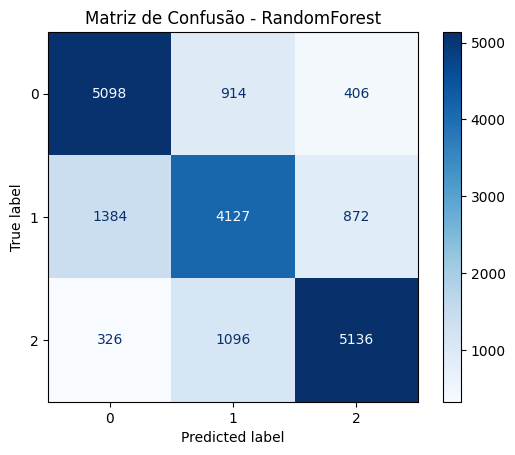

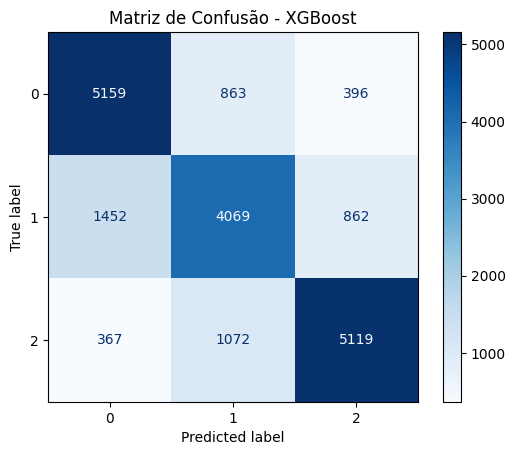

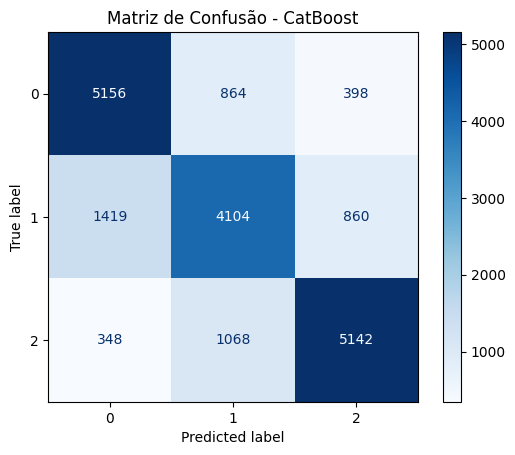

In [131]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

In [133]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)

                     Feature  Importância  Desvio_Padrao        Modelo
0        ideb_2017_municipio     0.009160       0.000958  RandomForest
1                   rf_idade     0.033507       0.001579  RandomForest
2           dias_atualizacao     0.009298       0.001081  RandomForest
3         dias_cadastramento     0.009746       0.001111  RandomForest
4               qtde_pessoas     0.038380       0.001642  RandomForest
..                       ...          ...            ...           ...
82  rf_trab_militar_servidor     0.009608       0.000428      CatBoost
83          cod_piso_cimento     0.000189       0.000232      CatBoost
84         cod_piso_ceramica     0.001928       0.000654      CatBoost
85  outra_div_administrativa     0.002669       0.000933      CatBoost
86                        PR     0.001653       0.000127      CatBoost

[87 rows x 4 columns]


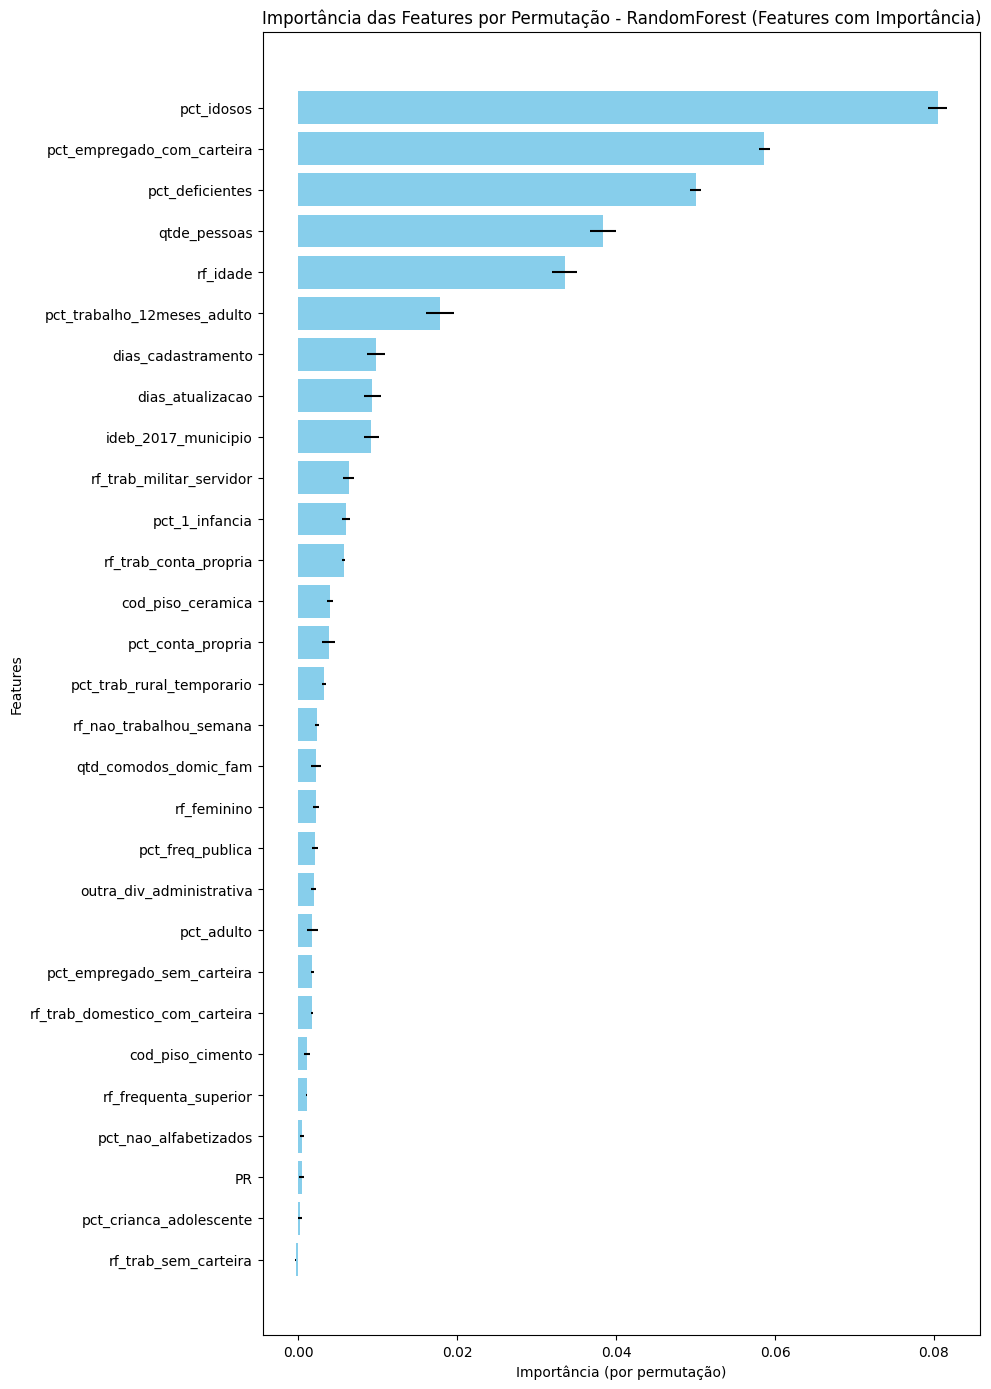

In [134]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 14))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

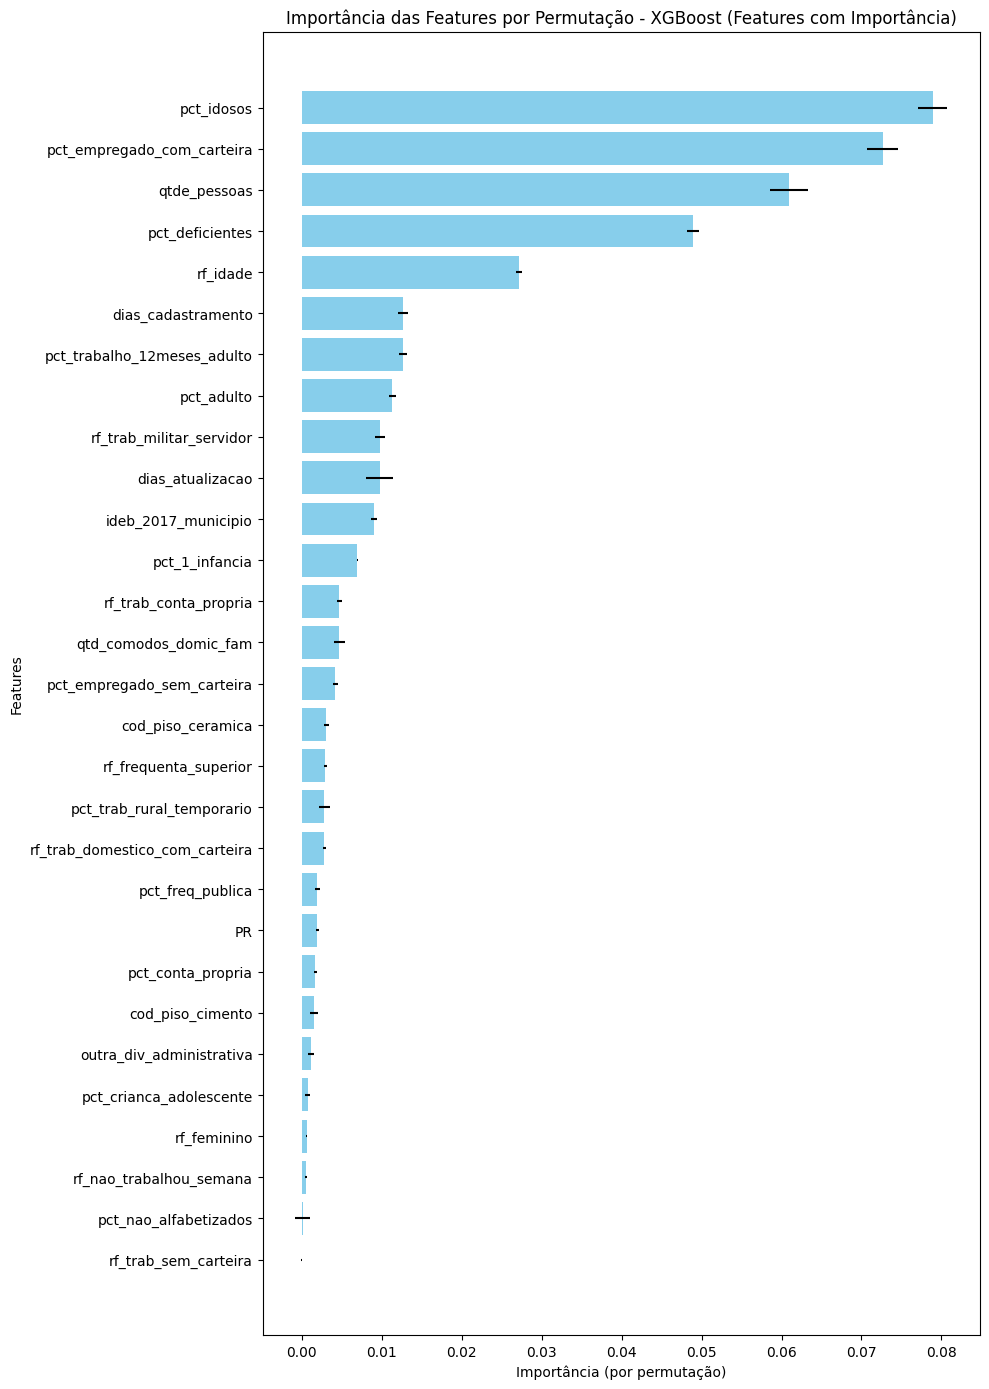

In [135]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 14))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

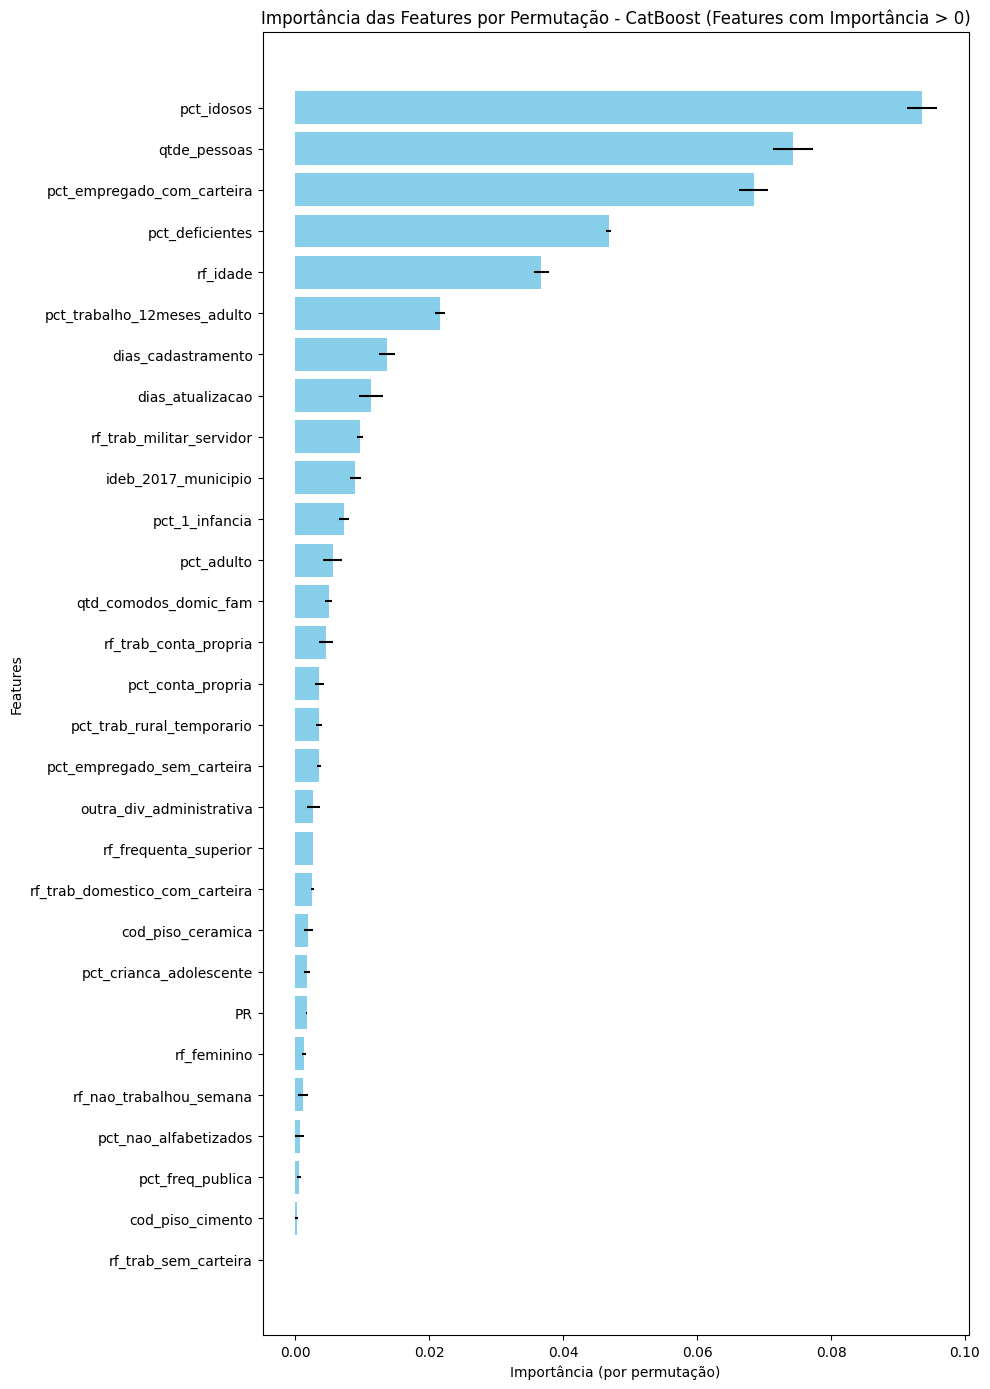

In [136]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [137]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Exibir as features com importância maior que a mediana para cada modelo
for model_name, important_features in important_features_per_model.items():
    print(f"\nFeatures com importância maior que a mediana para o modelo {model_name}:\n")
    print(important_features.to_string(index=False))


Features com importância maior que a mediana para o modelo RandomForest:

                    Feature  Importância
        ideb_2017_municipio     0.009160
                   rf_idade     0.033507
           dias_atualizacao     0.009298
         dias_cadastramento     0.009746
               qtde_pessoas     0.038380
             pct_1_infancia     0.005940
            pct_deficientes     0.050020
                 pct_idosos     0.080445
pct_trabalho_12meses_adulto     0.017787
 pct_empregado_com_carteira     0.058663
          pct_conta_propria     0.003805
      rf_trab_conta_propria     0.005682
   rf_trab_militar_servidor     0.006336
          cod_piso_ceramica     0.004012

Features com importância maior que a mediana para o modelo XGBoost:

                    Feature  Importância
        ideb_2017_municipio     0.009023
                   rf_idade     0.027205
           dias_atualizacao     0.009728
         dias_cadastramento     0.012690
               qtde_pessoas     0.0

In [138]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Conjunto para consolidar todas as features importantes
consolidated_important_features = set()

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]
    
    # Adicionar as features importantes ao conjunto consolidado
    consolidated_important_features.update(important_features['Feature'])

# Exibir as features consolidadas acima da mediana para os modelos
print("Features consolidadas com importância acima da mediana em pelo menos um dos modelos:")
for feature in consolidated_important_features:
    print(feature)

Features consolidadas com importância acima da mediana em pelo menos um dos modelos:
pct_conta_propria
pct_trabalho_12meses_adulto
rf_trab_conta_propria
pct_adulto
rf_idade
ideb_2017_municipio
rf_trab_militar_servidor
qtd_comodos_domic_fam
pct_empregado_com_carteira
dias_cadastramento
cod_piso_ceramica
pct_deficientes
pct_1_infancia
dias_atualizacao
qtde_pessoas
pct_idosos


## Retirando as features abaixo da mediana

In [139]:
df_features_importance_2.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  \
0            0.500306      0.166667               0.142857   
1            0.268572      0.583333               0.238095   
2            0.297921      0.083333               0.238095   
3            0.121522      0.083333               0.285714   
4            0.879700      0.166667               0.285714   

   pct_crianca_adolescente  pct_adulto  pct_1_infancia  pct_deficientes  \
0                 0.666667    0.333333        0.000000            0.000   
1                 0.375000    0.250000        0.375000            0.375   
2                 0.500000    0.500000        0.000000            0.000   
3                 0.000000    0.500000        0.500000            0.000   
4                 0.000000    0.666667        0.333333            0.000   

   pct_idosos  pct_freq_publica  pct_nao_alfabetizados  \
0         0.0          0.666667               0.333333   
1         0.0          0.375000               0.125000   
2         0.0          0.000000               0.000000   
3         0.0          0.000000               0.000000   
4         0.0          0.333333               0.000000   

   pct_trabalho_12meses_adulto  pct_empregado_com_carteira  \
0                     0.333333                         0.0   
1                     0.000000                         0.0   
2                     0.500000                         0.0   
3                     0.500000                         0.0   
4                     0.333333                         0.0   

   pct_empregado_sem_carteira  pct_trab_rural_temporario  pct_conta_propria  \
0                         0.0                        0.0           0.333333   
1                         0.0                        0.0           0.000000   
2                         0.0                        0.0           0.500000   
3                         0.0                        0.0           0.500000   
4                         0.0                        0.0           0.333333   

   rf_nao_trabalhou_semana  rf_feminino  rf_frequenta_superior  \
0                      0.0          1.0                    0.0   
1                      1.0          1.0                    0.0   
2                      0.0          0.0                    0.0   
3                      0.0          1.0                    0.0   
4                      0.0          1.0                    0.0   

   rf_trab_conta_propria  rf_trab_sem_carteira  \
0                    1.0                   0.0   
1                    0.0                   0.0   
2                    1.0                   0.0   
3                    1.0                   0.0   
4                    1.0                   0.0   

   rf_trab_domestico_com_carteira  rf_trab_militar_servidor  cod_piso_cimento  \
0                             0.0                       0.0               1.0   
1                             0.0                       0.0               1.0   
2                             0.0                       0.0               1.0   
3                             0.0                       0.0               1.0   
4                             0.0                       0.0               0.0   

   cod_piso_ceramica  outra_div_administrativa   PR  classe_renda  
0                0.0                       0.0  0.0             0  
1                0.0                       1.0  0.0             0  
2                0.0                       1.0  0.0             0  
3                0.0                       1.0  0.0             0  
4                1.0                       1.0  0.0             0

In [140]:
df_features_importance_2.shape

(96791, 31)

In [141]:
df_features_importance_2.columns

Index(['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       'pct_deficientes', 'pct_idosos', 'pct_freq_publica',
       'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto',
       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira',
       'pct_trab_rural_temporario', 'pct_conta_propria',
       'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_frequenta_superior',
       'rf_trab_conta_propria', 'rf_trab_sem_carteira',
       'rf_trab_domestico_com_carteira', 'rf_trab_militar_servidor',
       'cod_piso_cimento', 'cod_piso_ceramica', 'outra_div_administrativa',
       'PR', 'classe_renda'],
      dtype='object')

In [145]:
df_features_importance_3 = df_features_importance_2.drop(columns=[
       'pct_crianca_adolescente', 'pct_freq_publica',
       'pct_nao_alfabetizados', 
       'pct_empregado_sem_carteira',
       'pct_trab_rural_temporario',
       'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_frequenta_superior',
       'rf_trab_sem_carteira',
       'rf_trab_domestico_com_carteira', 
       'cod_piso_cimento', 'outra_div_administrativa',
       'PR'])

In [146]:
df_features_importance_3.head()

id_familia  ideb_2017_municipio  rf_idade  dias_atualizacao  \
0    4736936             0.574257  0.294118          0.331317   
1    2562870             0.554455  0.235294          0.056452   
2    1843654             0.495050  0.166667          0.390457   
3    1946851             0.514851  0.401961          0.180108   
4    4194650             0.554455  0.362745          0.385753   

   dias_cadastramento  qtde_pessoas  qtd_comodos_domic_fam  pct_adulto  \
0            0.500306      0.166667               0.142857    0.333333   
1            0.268572      0.583333               0.238095    0.250000   
2            0.297921      0.083333               0.238095    0.500000   
3            0.121522      0.083333               0.285714    0.500000   
4            0.879700      0.166667               0.285714    0.666667   

   pct_1_infancia  pct_deficientes  pct_idosos  pct_trabalho_12meses_adulto  \
0        0.000000            0.000         0.0                     0.333333   
1        0.375000            0.375         0.0                     0.000000   
2        0.000000            0.000         0.0                     0.500000   
3        0.500000            0.000         0.0                     0.500000   
4        0.333333            0.000         0.0                     0.333333   

   pct_empregado_com_carteira  pct_conta_propria  rf_trab_conta_propria  \
0                         0.0           0.333333                    1.0   
1                         0.0           0.000000                    0.0   
2                         0.0           0.500000                    1.0   
3                         0.0           0.500000                    1.0   
4                         0.0           0.333333                    1.0   

   rf_trab_militar_servidor  cod_piso_ceramica  classe_renda  
0                       0.0                0.0             0  
1                       0.0                0.0             0  
2                       0.0                0.0             0  
3                       0.0                0.0             0  
4                       0.0                1.0             0

In [147]:
df_features_importance_3.columns

Index(['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos',
       'pct_trabalho_12meses_adulto', 'pct_empregado_com_carteira',
       'pct_conta_propria', 'rf_trab_conta_propria',
       'rf_trab_militar_servidor', 'cod_piso_ceramica', 'classe_renda'],
      dtype='object')

In [148]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_features_importance_3[['ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos',
       'pct_trabalho_12meses_adulto', 'pct_empregado_com_carteira',
       'pct_conta_propria', 'rf_trab_conta_propria',
       'rf_trab_militar_servidor', 'cod_piso_ceramica']]
y = df_features_importance_3['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 16)


ideb_2017_municipio  rf_idade  dias_atualizacao  dias_cadastramento  \
0             0.574257  0.294118          0.331317            0.500306   
1             0.554455  0.235294          0.056452            0.268572   
2             0.495050  0.166667          0.390457            0.297921   
3             0.514851  0.401961          0.180108            0.121522   
4             0.554455  0.362745          0.385753            0.879700   

   qtde_pessoas  qtd_comodos_domic_fam  pct_adulto  pct_1_infancia  \
0      0.166667               0.142857    0.333333        0.000000   
1      0.583333               0.238095    0.250000        0.375000   
2      0.083333               0.238095    0.500000        0.000000   
3      0.083333               0.285714    0.500000        0.500000   
4      0.166667               0.285714    0.666667        0.333333   

   pct_deficientes  pct_idosos  pct_trabalho_12meses_adulto  \
0            0.000         0.0                     0.333333   
1            0.375         0.0                     0.000000   
2            0.000         0.0                     0.500000   
3            0.000         0.0                     0.500000   
4            0.000         0.0                     0.333333   

   pct_empregado_com_carteira  pct_conta_propria  rf_trab_conta_propria  \
0                         0.0           0.333333                    1.0   
1                         0.0           0.000000                    0.0   
2                         0.0           0.500000                    1.0   
3                         0.0           0.500000                    1.0   
4                         0.0           0.333333                    1.0   

   rf_trab_militar_servidor  cod_piso_ceramica  
0                       0.0                0.0  
1                       0.0                0.0  
2                       0.0                0.0  
3                       0.0                0.0  
4                       0.0                1.0

In [149]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classe_renda, dtype: int64

In [150]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Testando os modelos com a 3ª limpeza de features

In [151]:
# Definir os modelos e os parâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
   
    }
}

In [152]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}


In [153]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo: RandomForest
  F1 Score: 0.73
  Acurácia: 0.73
Modelo: XGBoost
  F1 Score: 0.73
  Acurácia: 0.73
Modelo: CatBoost
  F1 Score: 0.73
  Acurácia: 0.73


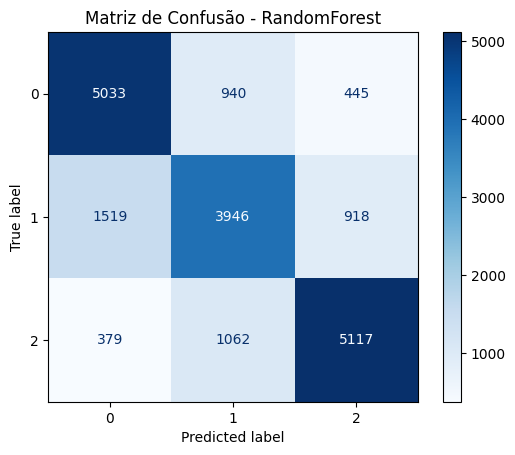

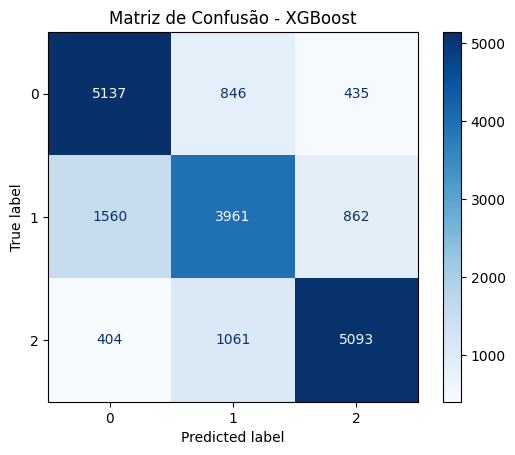

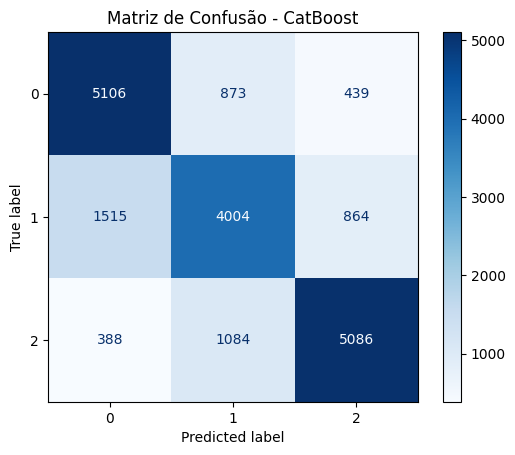

In [154]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()